В этом файле будет предобработка данных из двух датасетов для подготовки к обучению регрессионной модели.

In [ ]:
import pandas as pd
import numpy as np
# Импорт библиотек

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving enhanced_anxiety_dataset.csv to enhanced_anxiety_dataset.csv


In [ ]:
Big_stress_data=pd.read_csv("enhanced_anxiety_dataset.csv")

Это базовые данные, которые я не буду менять


In [ ]:
Big_stress_data.shape

(11000, 19)

In [ ]:
Big_stress_data.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


Processed_Big_stress_data - Данные из первого датасета, которые я буду обрабатывать

In [ ]:
Processed_Big_stress_data=Big_stress_data


Теперь нужно посмотреть на .info(), .describe(), а также на характер наших данных:
Корреляция, распределение, p-value.

In [ ]:
Processed_Big_stress_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

Выходит, в наших данных нет ни одного пропуска.

In [ ]:
Processed_Big_stress_data.describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,40.241727,6.650691,2.942136,286.090000,9.701636,5.856364,90.916000,20.957545,3.080636,2.427818,5.181818,3.929364
std,13.236140,1.227509,1.827825,144.813157,5.689713,2.927202,17.325721,5.160107,1.398877,2.183106,2.895243,2.122533
min,18.000000,2.300000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,29.000000,5.900000,1.500000,172.000000,5.000000,3.000000,76.000000,17.000000,2.000000,1.000000,3.000000,2.000000
50%,40.000000,6.700000,2.800000,273.000000,10.000000,6.000000,92.000000,21.000000,3.000000,2.000000,5.000000,4.000000
75%,51.000000,7.500000,4.200000,382.000000,15.000000,8.000000,106.000000,25.000000,4.000000,4.000000,8.000000,5.000000
max,64.000000,11.300000,10.100000,599.000000,19.000000,10.000000,119.000000,29.000000,5.000000,12.000000,10.000000,10.000000


Мне стало интересно, насколько больше пьют с возрастом

In [ ]:
import seaborn as sns
#библиотека для графиков

Анализ Данных

<Axes: xlabel='Age', ylabel='Alcohol Consumption (drinks/week)'>

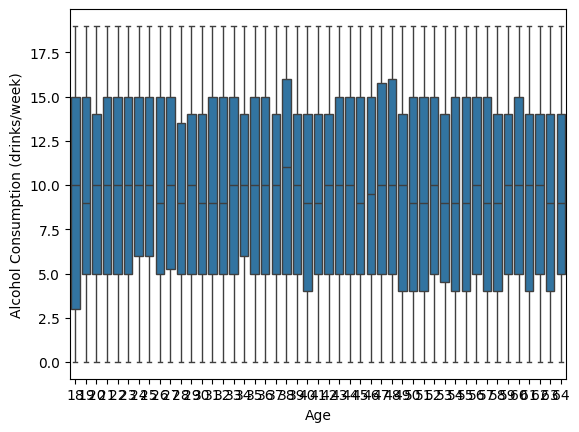

In [ ]:
sns.boxplot(data=Processed_Big_stress_data,x=Processed_Big_stress_data.Age,y=Processed_Big_stress_data["Alcohol Consumption (drinks/week)"])

10.0


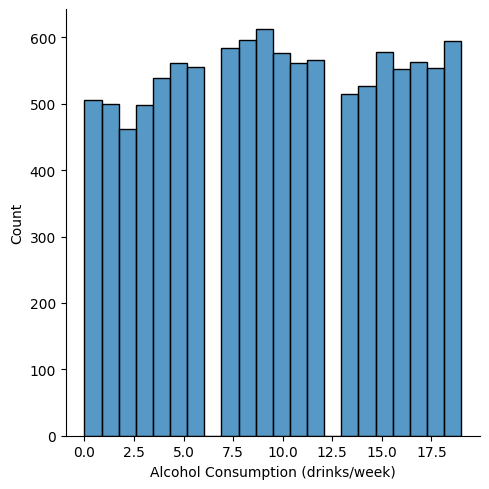

In [ ]:
print(Processed_Big_stress_data['Alcohol Consumption (drinks/week)'].median())
sns.displot(data=Processed_Big_stress_data,x=Processed_Big_stress_data['Alcohol Consumption (drinks/week)'])

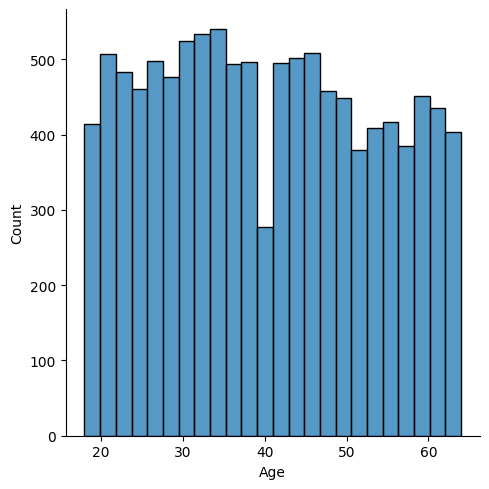

In [ ]:
sns.displot(data=Processed_Big_stress_data,x=Processed_Big_stress_data.Age)

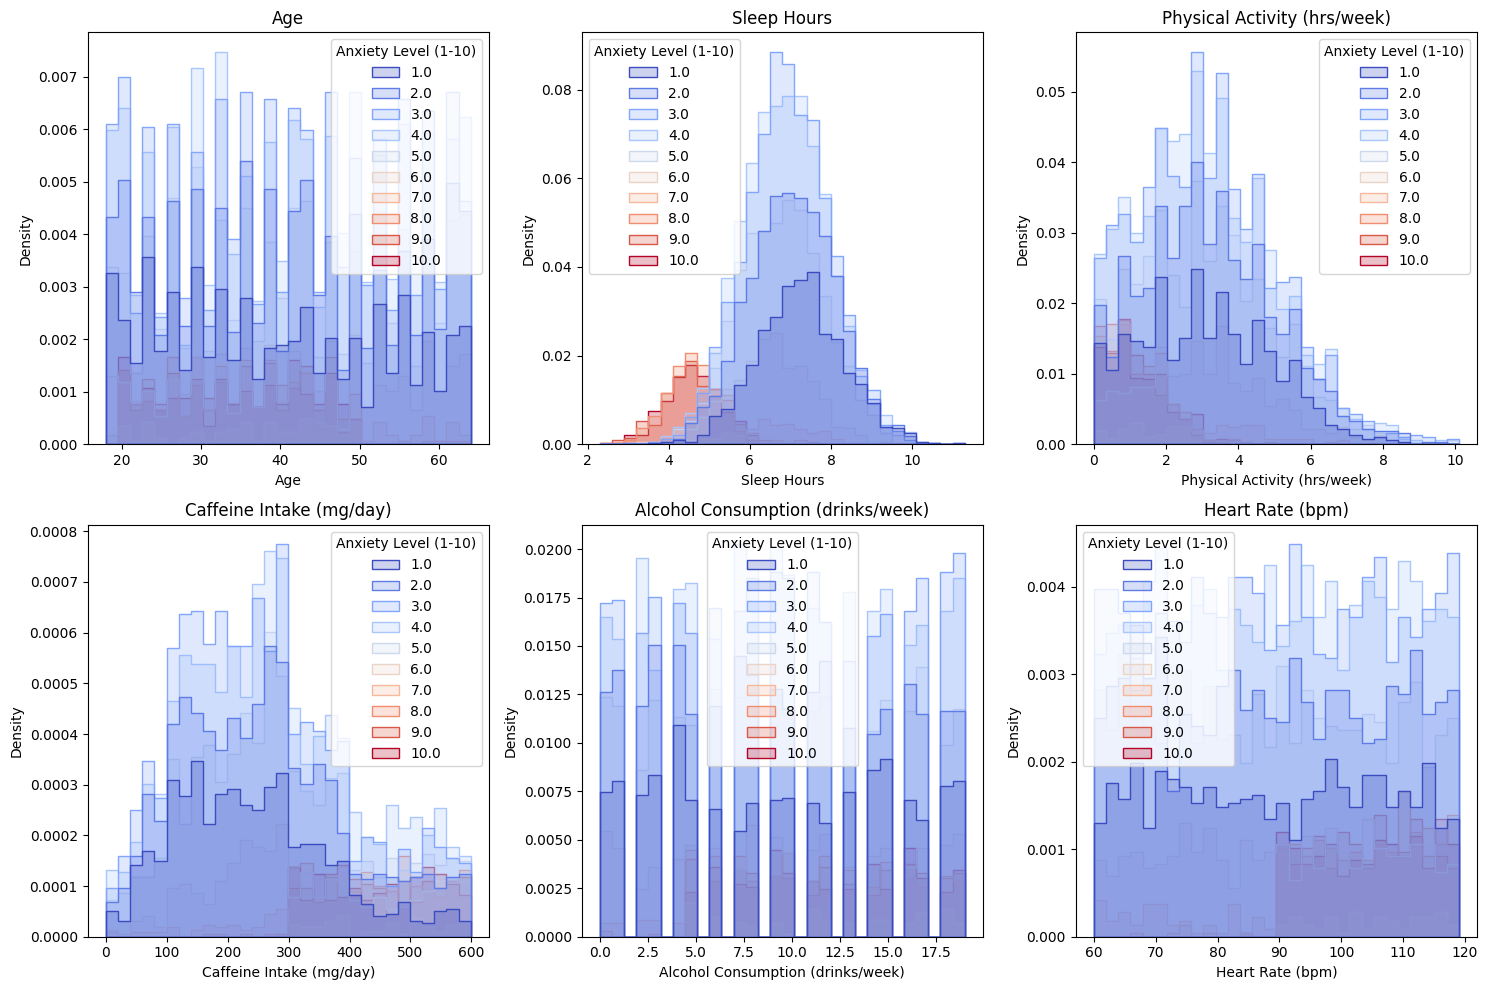

In [ ]:
import matplotlib.pyplot as plt

num_cols = [
    'Age','Sleep Hours','Physical Activity (hrs/week)',
    'Caffeine Intake (mg/day)','Alcohol Consumption (drinks/week)',
    'Heart Rate (bpm)','Breathing Rate (breaths/min)',
    'Sweating Level (1-5)','Therapy Sessions (per month)',
    'Diet Quality (1-10)'
]

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols[:6]):  # первые 6 для примера
    plt.subplot(2,3,i+1)
    sns.histplot(
        data=Big_stress_data, x=col, hue='Anxiety Level (1-10)',
        bins=30, palette='coolwarm', element='step', stat='density'
    )
    plt.title(col)
plt.tight_layout()
plt.show()

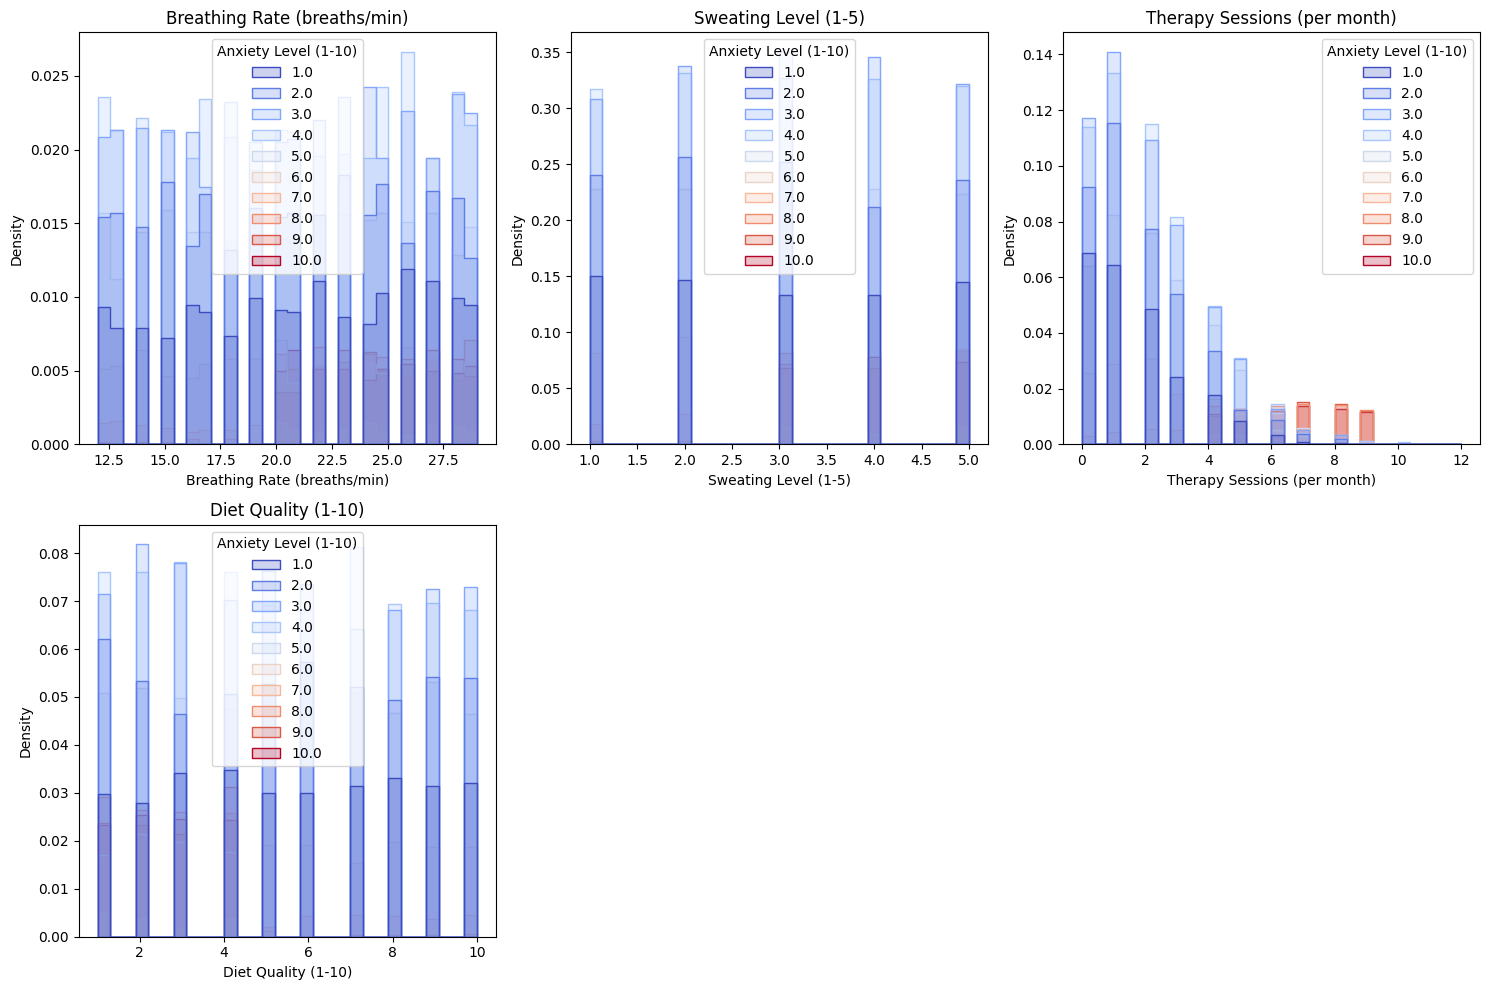

In [ ]:
num_cols = ['Breathing Rate (breaths/min)',
    'Sweating Level (1-5)','Therapy Sessions (per month)',
    'Diet Quality (1-10)'
]

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols[:6]):  # первые 6 для примера
    plt.subplot(2,3,i+1)
    sns.histplot(
        data=Big_stress_data, x=col, hue='Anxiety Level (1-10)',
        bins=30, palette='coolwarm', element='step', stat='density'
    )
    plt.title(col)
plt.tight_layout()
plt.show()

Сделаю сразу БейзЛайн.
Для этого нужно предобработать данные в формат для случайного леса.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X=Processed_Big_stress_data.drop(['Anxiety Level (1-10)','Stress Level (1-10)'],axis=1)
#y=Big_stress_data['Stress Level (1-10)']
y=Big_stress_data['Anxiety Level (1-10)']

In [ ]:
#Удалим пока Occupation
X=X.drop(['Occupation'],axis=1)

Конвертация "String to Float"

In [ ]:
X['Gender']=X['Gender'].replace({'Male':1,'Female':0,'Other':0.5})
X=X.rename(columns={'Gender':'Sex_male'})

/tmp/ipython-input-3247953424.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Gender']=X['Gender'].replace({'Male':1,'Female':0,'Other':0.5})


In [ ]:
X['Smoking']=X['Smoking'].replace({'Yes':1,'No':0})
X=X.rename(columns={'Smoking':'Smoking_True'})

/tmp/ipython-input-2898982337.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Smoking']=X['Smoking'].replace({'Yes':1,'No':0})


In [ ]:
X['Family History of Anxiety']=X['Family History of Anxiety'].replace({'Yes':1,'No':0})
X['Dizziness']=X['Dizziness'].replace({'Yes':1,'No':0})
X['Medication']=X['Medication'].replace({'Yes':1,'No':0})
X['Recent Major Life Event']=X['Recent Major Life Event'].replace({'Yes':1,'No':0})
X=X.rename(columns={'Family History of Anxiety':'Family History of Anxiety_True','Dizziness':'Dizziness_True','Medication':'Medication_True','Recent Major Life Event':'Life_Event_True'})

/tmp/ipython-input-3638185913.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Family History of Anxiety']=X['Family History of Anxiety'].replace({'Yes':1,'No':0})
/tmp/ipython-input-3638185913.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Dizziness']=X['Dizziness'].replace({'Yes':1,'No':0})
/tmp/ipython-input-3638185913.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-i

Теперь наши данные только числового формата.

In [ ]:
X.head()

,Age,Sex_male,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking_True,Family History of Anxiety_True,Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness_True,Medication_True,Therapy Sessions (per month),Life_Event_True,Diet Quality (1-10)
0,29,0.0,6.0,2.7,181,10,1,0,114,14,4,0,1,3,1,7
1,46,0.5,6.2,5.7,200,8,1,1,62,23,2,1,0,2,0,8
2,64,1.0,5.0,3.7,117,4,0,1,91,28,3,0,0,1,1,1
3,20,0.0,5.8,2.8,360,6,1,0,86,17,3,0,0,0,0,1
4,49,0.0,8.2,2.3,247,4,1,0,98,19,4,1,1,1,0,3


In [ ]:
y.head()

,Anxiety Level (1-10)
0,5.0
1,3.0
2,1.0
3,2.0
4,1.0


Подготовка к обучению

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% данных пойдут в тест
    random_state=42,    # для воспроизводимости
    shuffle=True        # перемешать данные перед разбиением
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_regr=RandomForestRegressor(random_state=42 )

In [ ]:

param_dist = {
    'n_estimators': np.arange(50,61,10),
    'max_depth': np.arange(2,10,2),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 6)
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(
    rf_regr,
    param_distributions=param_dist,
    n_iter=40,          # количество случайных комбинаций
    #scoring='neg_mean_squared_error',
    cv=5,               # кросс-валидация
    n_jobs=-1,
    #verbose=3,
    random_state=42,
    #return_train_score=True
)

In [ ]:
rand_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'max_depth': array([2, 4, 6, 8]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([50, 60])},
                   random_state=42)

In [ ]:
My_best_params=rand_search.best_params_
My_best_params

{'n_estimators': np.int64(50),
 'min_samples_split': np.int64(3),
 'min_samples_leaf': np.int64(1),
 'max_depth': np.int64(8)}

In [ ]:
BaseLine_BestModel=rand_search.best_estimator_

In [ ]:
Y_predict=BaseLine_BestModel.predict(X_test)

In [ ]:
X_test.shape

(2200, 16)

In [ ]:
n = X_test.shape[0]   # число наблюдений
p = X_test.shape[1]
r2_score(y_test, Y_predict)
adj_r2_score = 1 - (1 - r2_score(y_test, Y_predict)) * (n - 1) / (n - p - 1)

In [ ]:
print(mean_absolute_error(y_test, Y_predict))
print(mean_squared_error(y_test, Y_predict))
print(np.sqrt(mean_squared_error(y_test, Y_predict)))
print(r2_score(y_test, Y_predict))
print(adj_r2_score)

1.1194908820284932
1.8567608198385113
1.3626301111594854
0.5992901072288392
0.596353158862216


In [ ]:
processed_dataset=pd.concat([X, y], axis=1)

In [ ]:
print(processed_dataset.shape)
processed_dataset.head()

(11000, 17)


,Age,Sex_male,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking_True,Family History of Anxiety_True,Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness_True,Medication_True,Therapy Sessions (per month),Life_Event_True,Diet Quality (1-10),Anxiety Level (1-10)
0,29,0.0,6.0,2.7,181,10,1,0,114,14,4,0,1,3,1,7,5.0
1,46,0.5,6.2,5.7,200,8,1,1,62,23,2,1,0,2,0,8,3.0
2,64,1.0,5.0,3.7,117,4,0,1,91,28,3,0,0,1,1,1,1.0
3,20,0.0,5.8,2.8,360,6,1,0,86,17,3,0,0,0,0,1,2.0
4,49,0.0,8.2,2.3,247,4,1,0,98,19,4,1,1,1,0,3,1.0


In [ ]:
processed_dataset.to_csv('processed_dataset_1.csv', index=False)

In [ ]:
from google.colab import files
files.download('processed_dataset_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*Теперь приступаю к построению бейзлайна для второго датасета*

Можно начинать компилировать код отсюда

In [ ]:
import pandas as pd
import numpy as np
# Импорт библиотек

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mind-O-Meter.csv to Mind-O-Meter.csv


In [ ]:
df_under_study=pd.read_csv("Mind-O-Meter.csv")

In [ ]:
df_under_study.head()

,Age,Gender,Ethnicity,EducationLevel,EmploymentStatus,DepressionScore_PHQ9,AnxietyScore_GAD7,StressLevel,SleepHours,AppetiteChange,SubstanceUse,PhysicalActivity,SocialInteractions,LivingSituation,SupportSystems,TraumaticEvents,NeedsProfessionalHelp
0,56,Male,Asian,Doctorate,Employed,0,5,Low,6.1,Increased,No,Moderate,Limited,With family,Moderate,No,Yes
1,69,Male,Hispanic,High School,Employed,9,18,Moderate,7.8,Stable,No,Moderate,Good,With family,Moderate,No,Yes
2,46,Non-binary,Caucasian,High School,Student,3,7,High,7.2,Increased,No,Moderate,Poor,Alone,Moderate,No,No
3,32,Female,Hispanic,Bachelor’s Degree,Unemployed,8,2,Low,6.4,Stable,No,High,Good,With family,Strong,No,No
4,60,Female,African American,High School,Unemployed,12,13,Low,8.0,Stable,No,High,Good,With roommates,Strong,No,Yes


In [ ]:
df_under_study.shape

(5000, 17)

In [ ]:
df_under_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    5000 non-null   int64  
 1   Gender                 5000 non-null   object 
 2   Ethnicity              5000 non-null   object 
 3   EducationLevel         5000 non-null   object 
 4   EmploymentStatus       5000 non-null   object 
 5   DepressionScore_PHQ9   5000 non-null   int64  
 6   AnxietyScore_GAD7      5000 non-null   int64  
 7   StressLevel            5000 non-null   object 
 8   SleepHours             5000 non-null   float64
 9   AppetiteChange         5000 non-null   object 
 10  SubstanceUse           5000 non-null   object 
 11  PhysicalActivity       5000 non-null   object 
 12  SocialInteractions     5000 non-null   object 
 13  LivingSituation        5000 non-null   object 
 14  SupportSystems         5000 non-null   object 
 15  Trau

In [ ]:
df_under_study.describe()

,Age,DepressionScore_PHQ9,AnxietyScore_GAD7,SleepHours
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.584600,13.767200,10.602200,6.997640
std,14.919094,8.004063,6.313979,1.473085
min,18.000000,0.000000,0.000000,4.000000
25%,31.000000,7.000000,5.000000,6.000000
50%,43.000000,14.000000,11.000000,7.000000
75%,56.000000,21.000000,16.000000,8.000000
max,69.000000,27.000000,21.000000,12.000000


In [ ]:
import seaborn as sns
#библиотека для графиков
import matplotlib.pyplot as plt

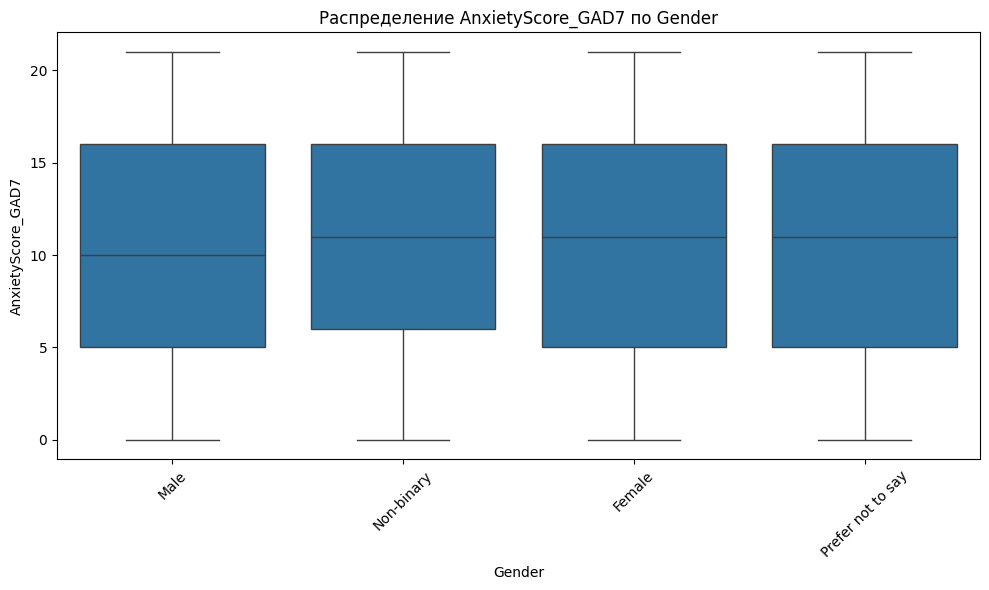

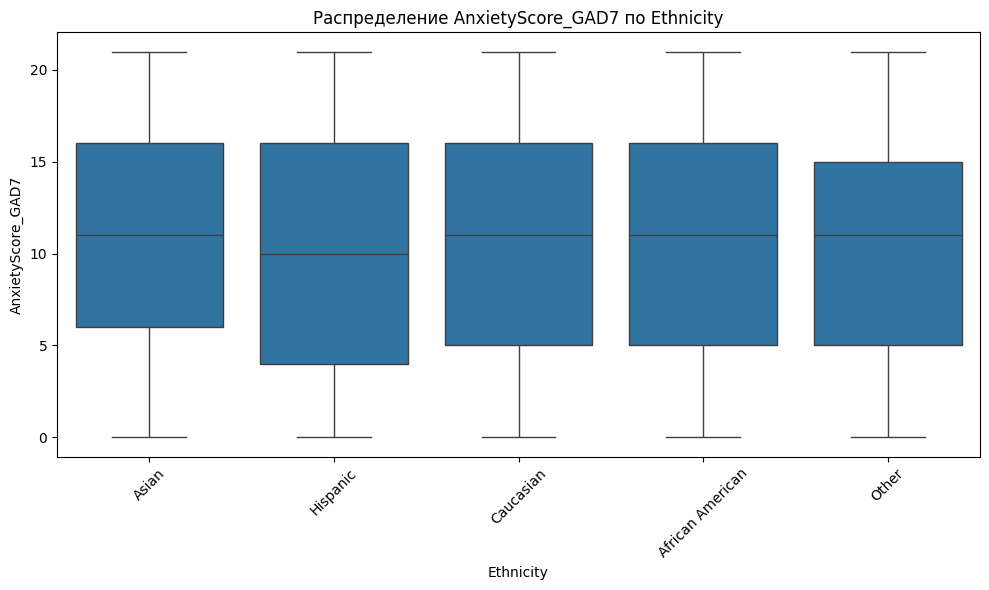

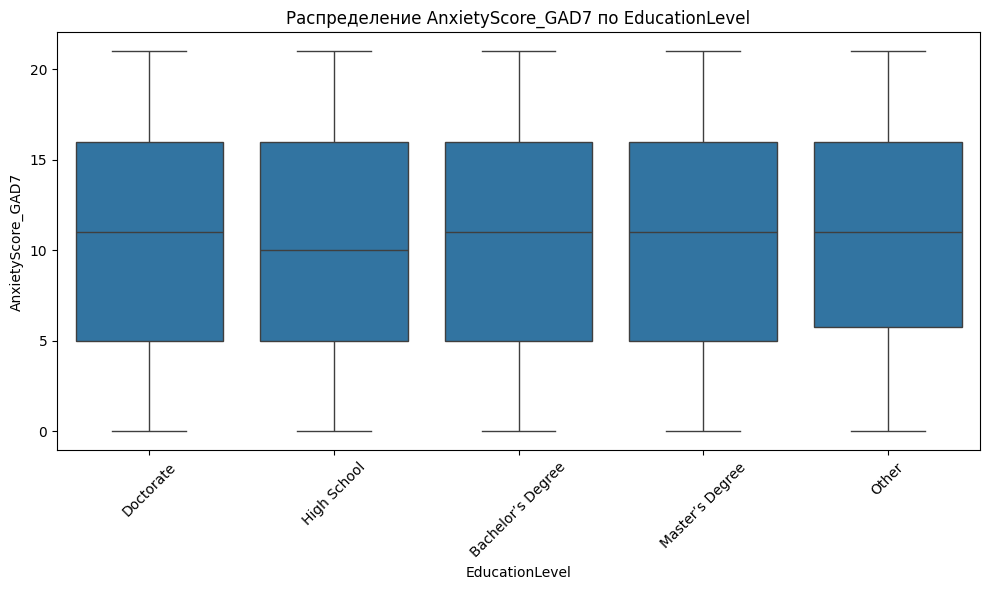

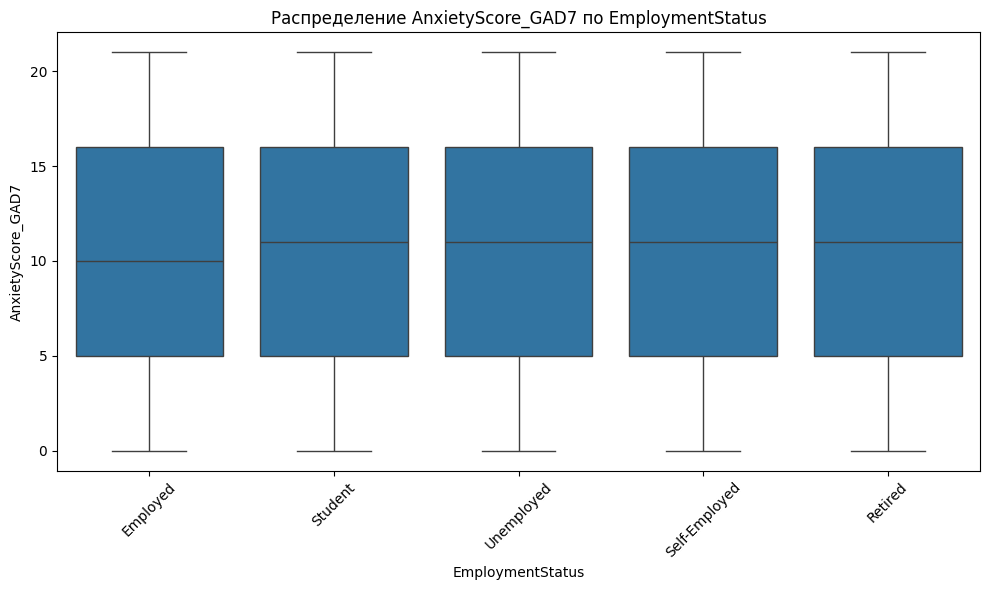

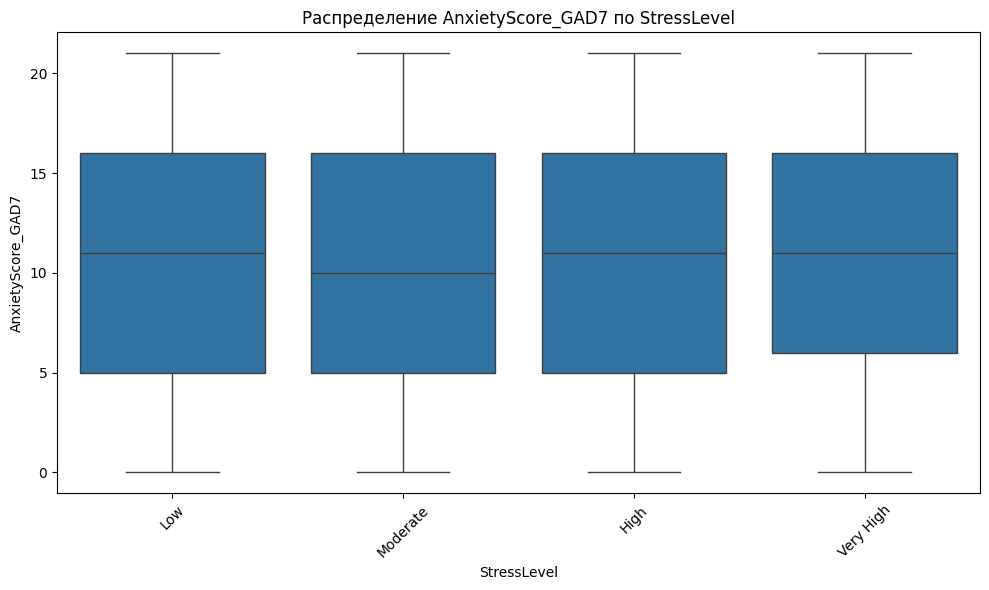

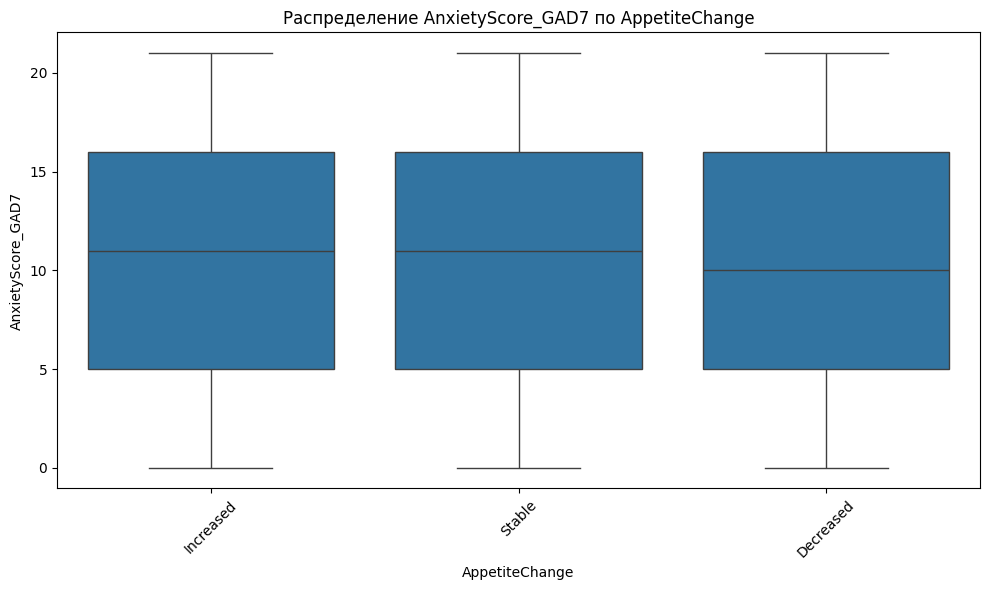

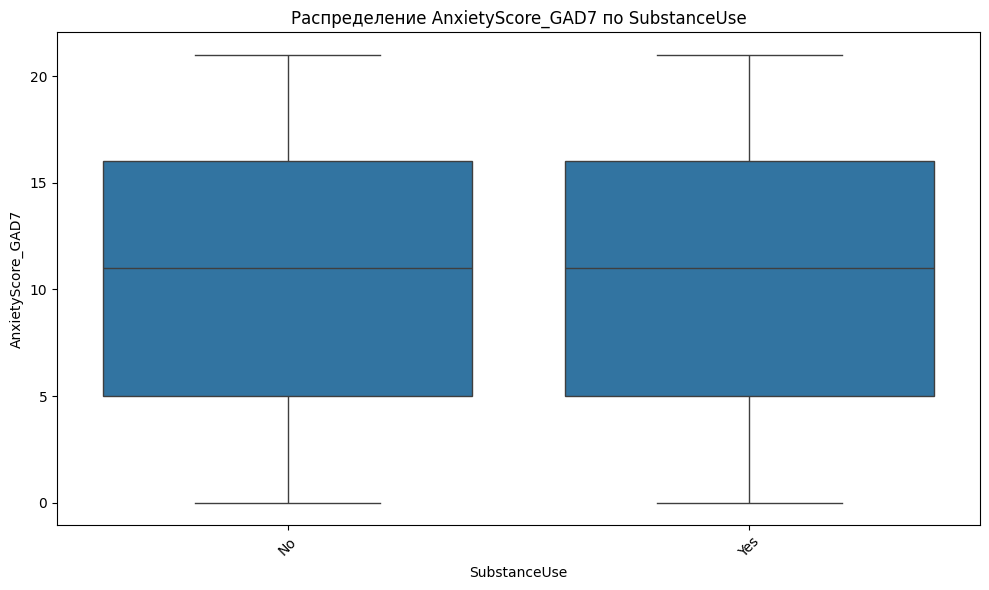

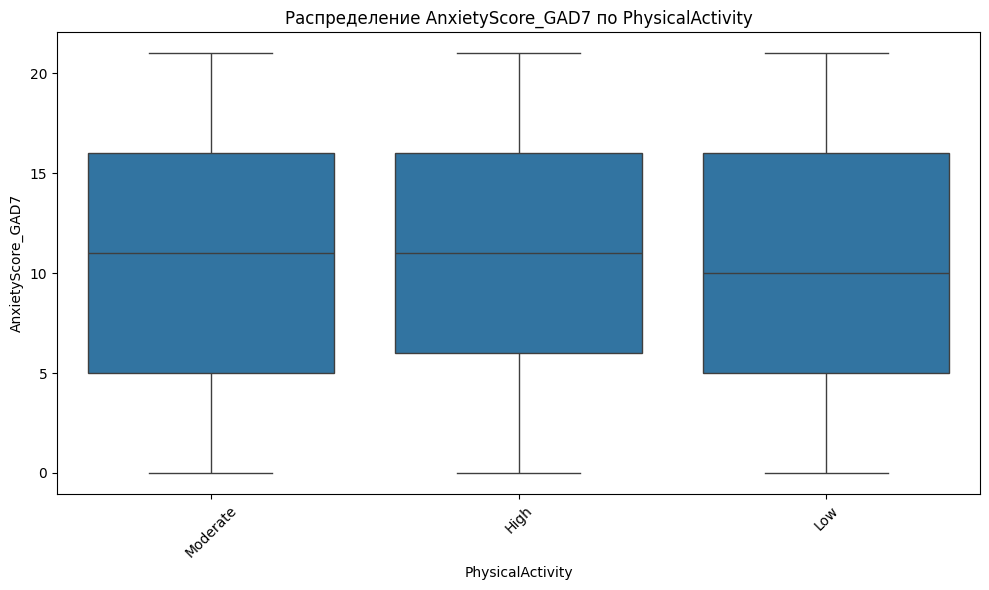

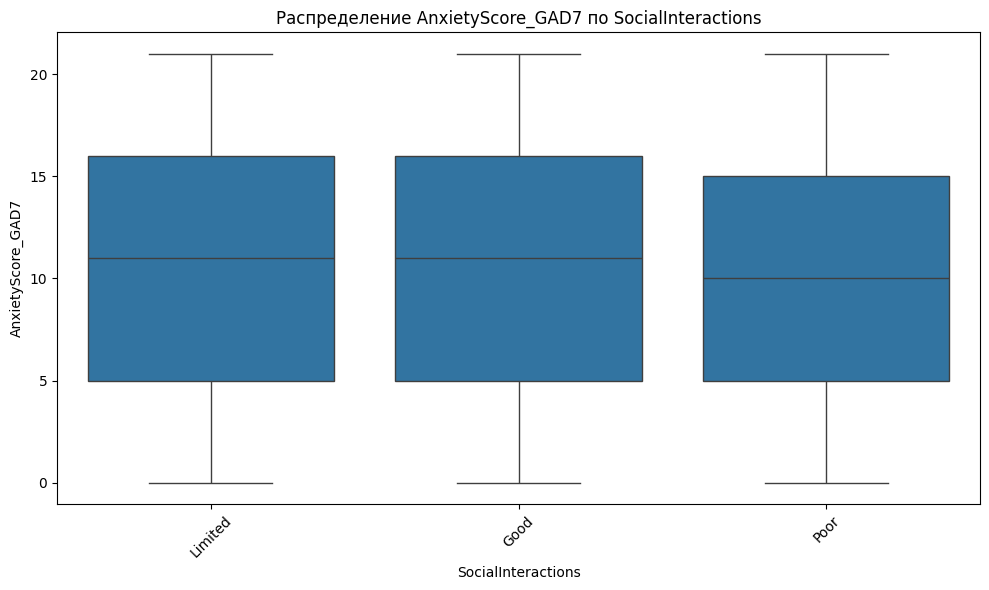

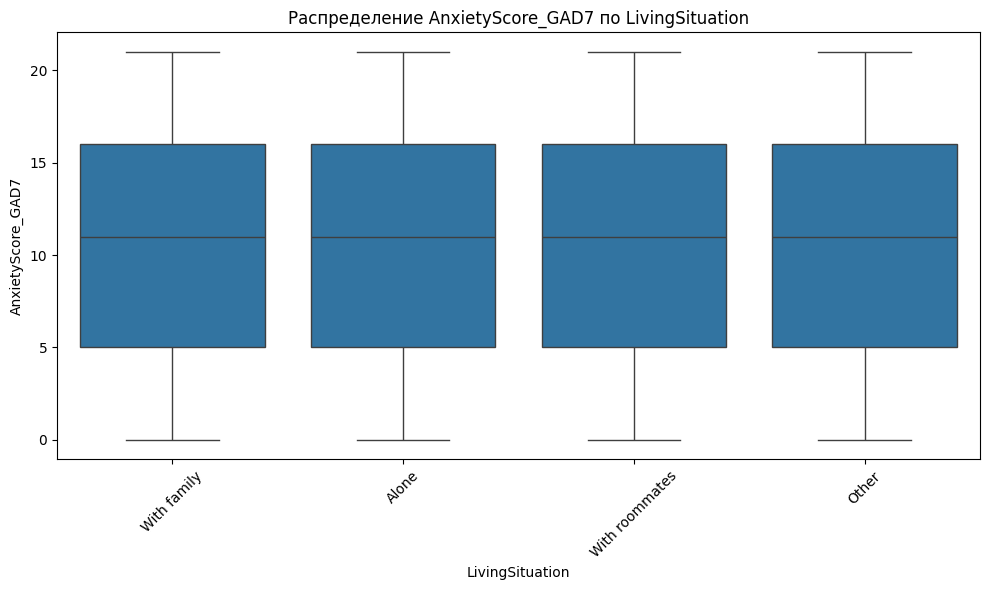

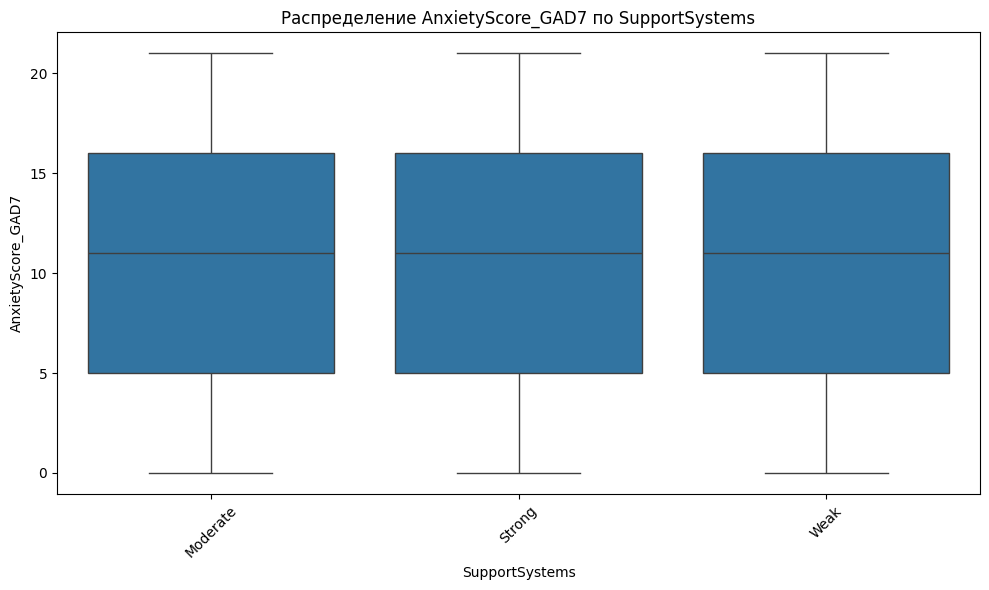

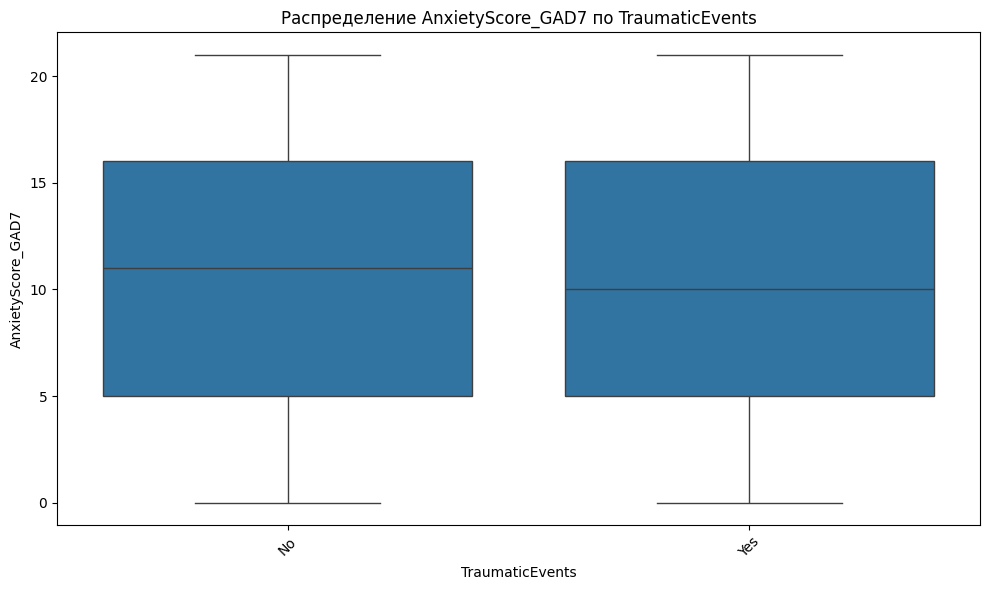

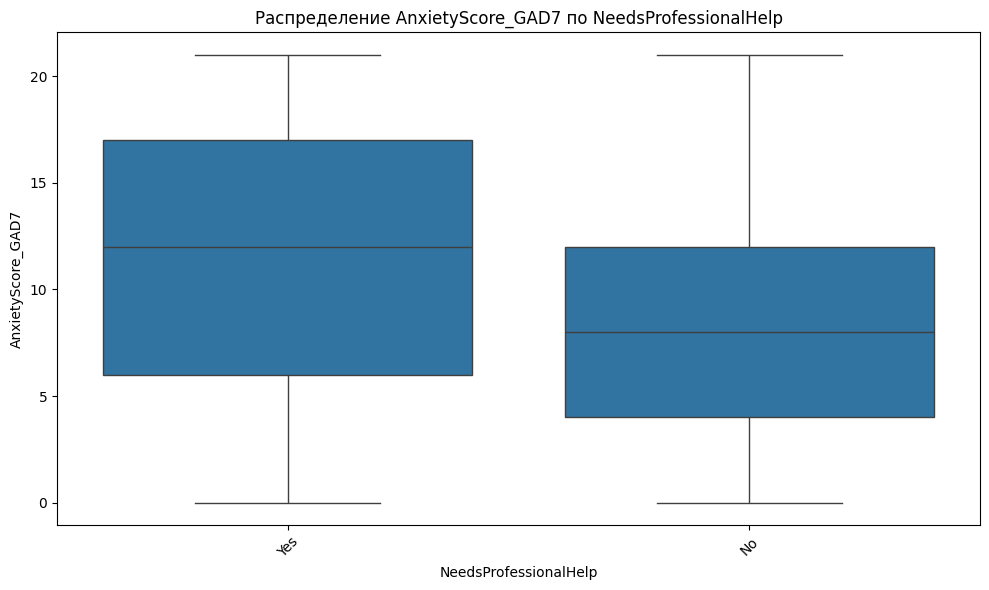

In [ ]:
target = 'AnxietyScore_GAD7'

# Найдём категориальные переменные (номинативные)
categorical_cols = df_under_study.select_dtypes(include=['object', 'category']).columns.tolist()

# Построим боксплоты для каждой категориальной переменной
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y=target, data=df_under_study)
    plt.title(f'Распределение {target} по {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

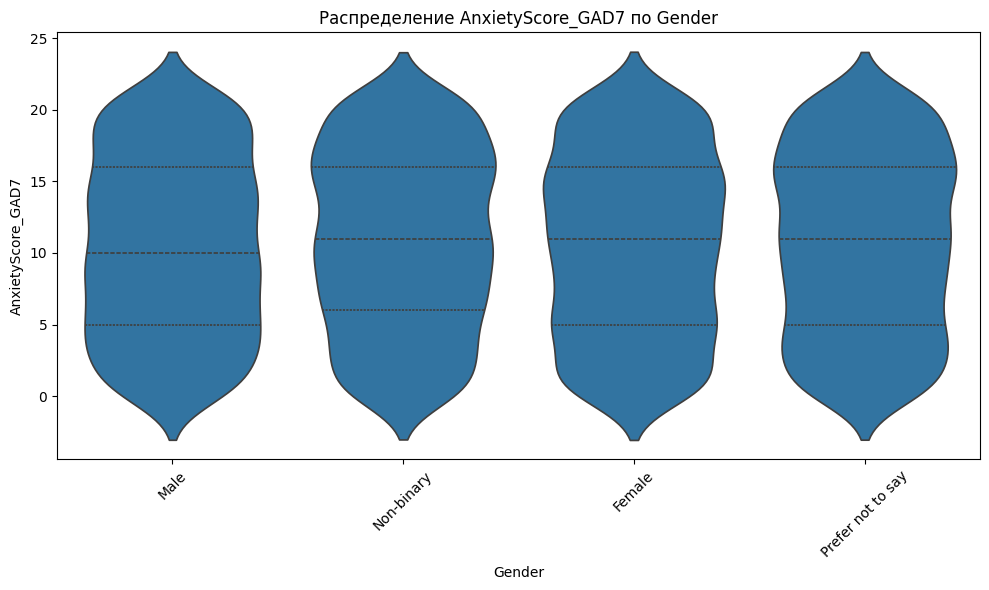

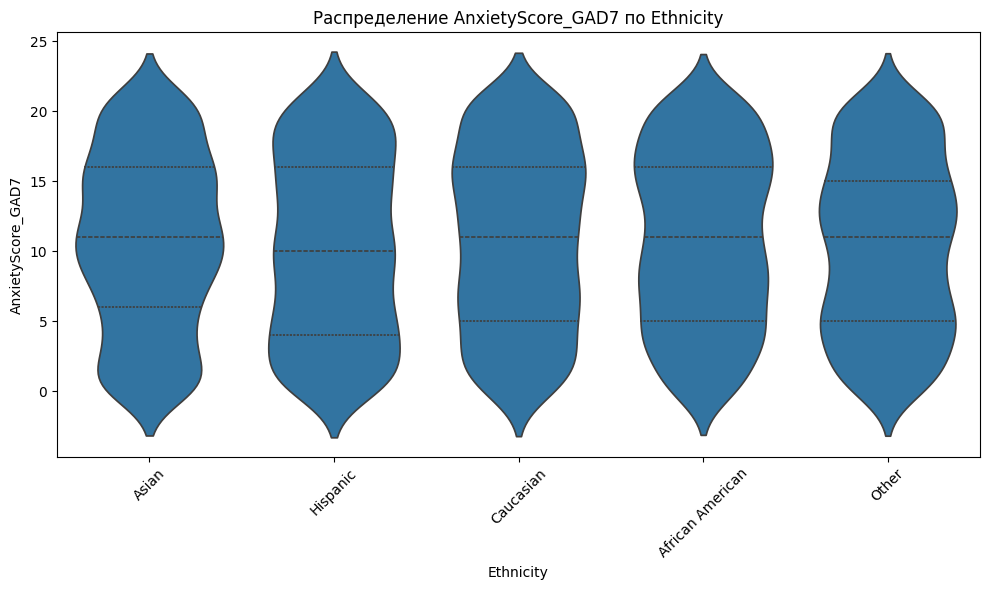

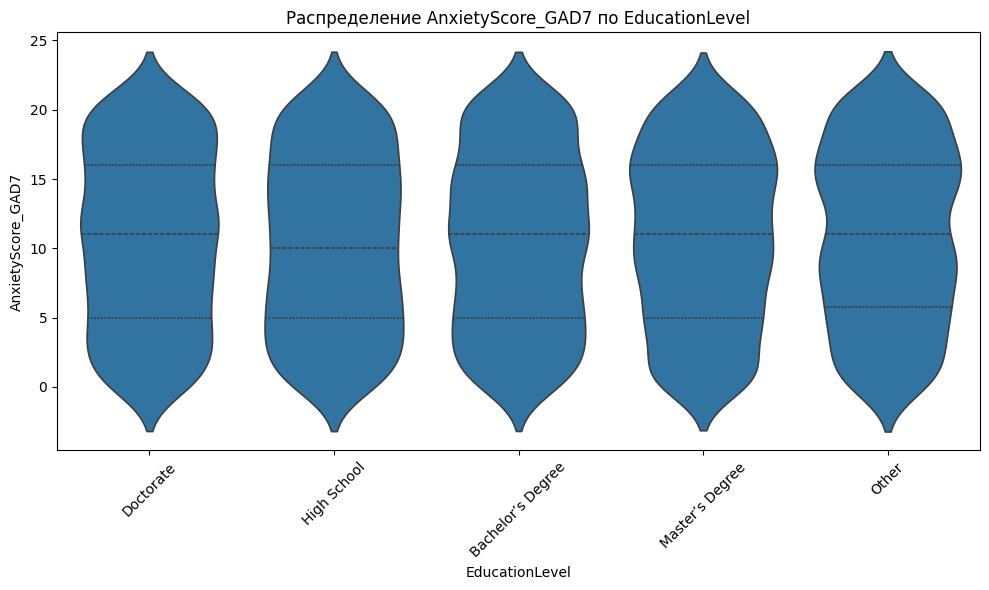

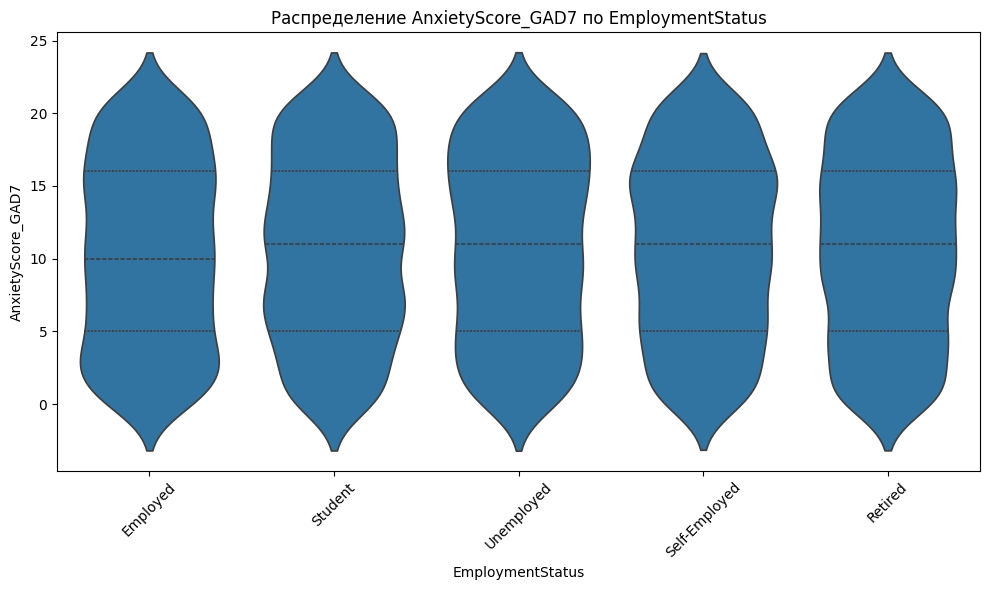

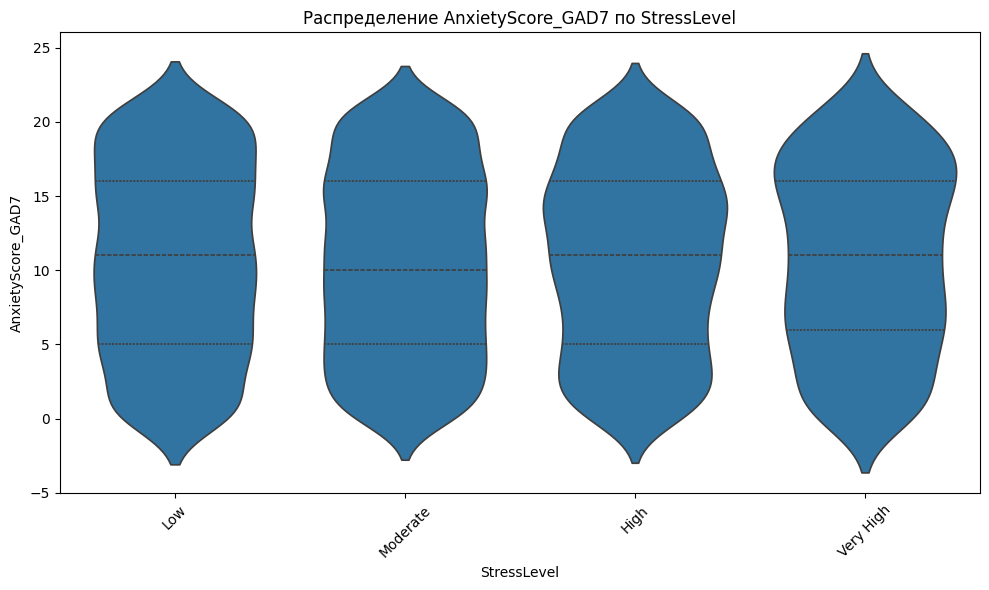

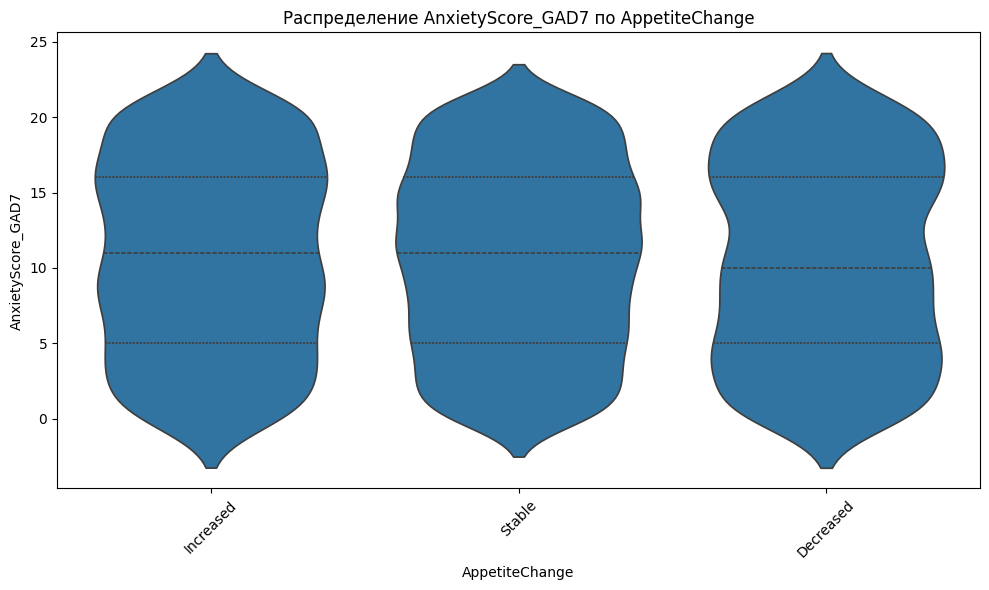

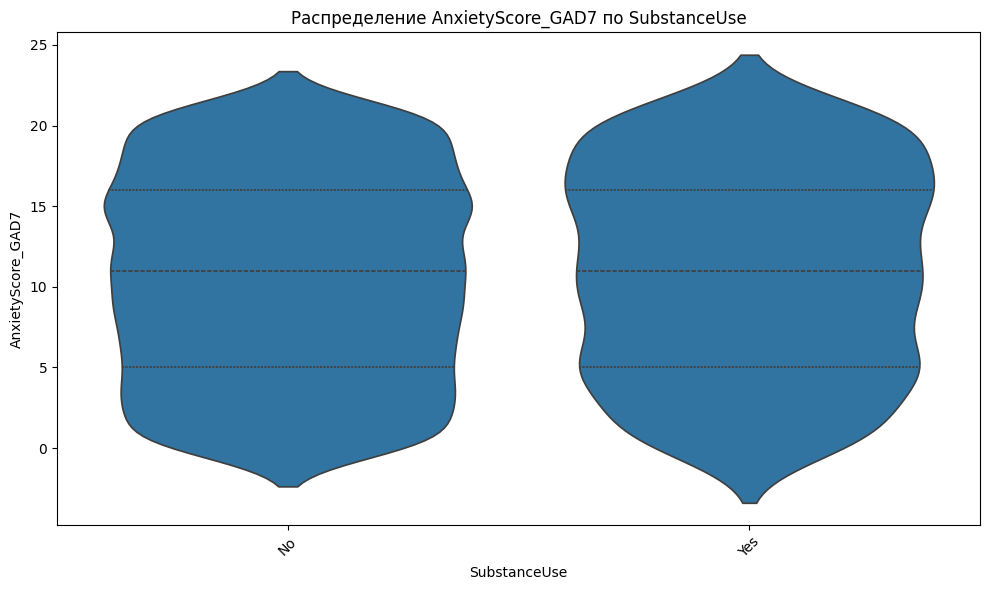

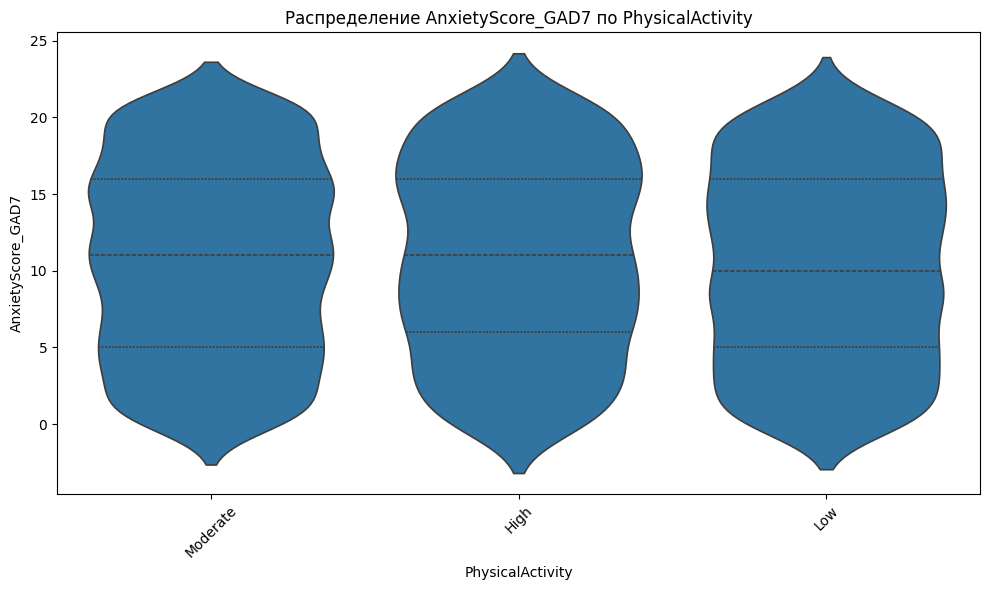

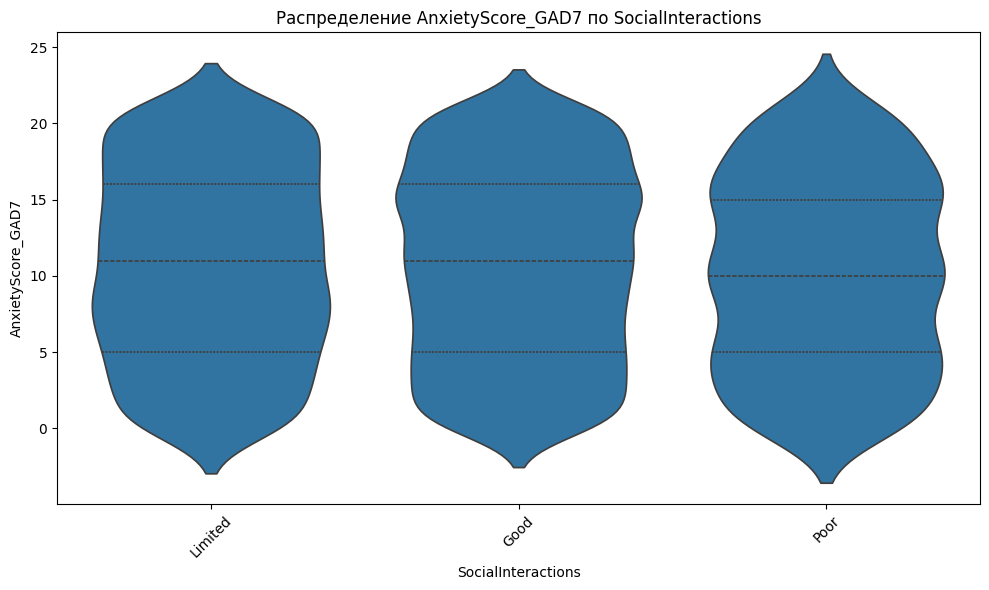

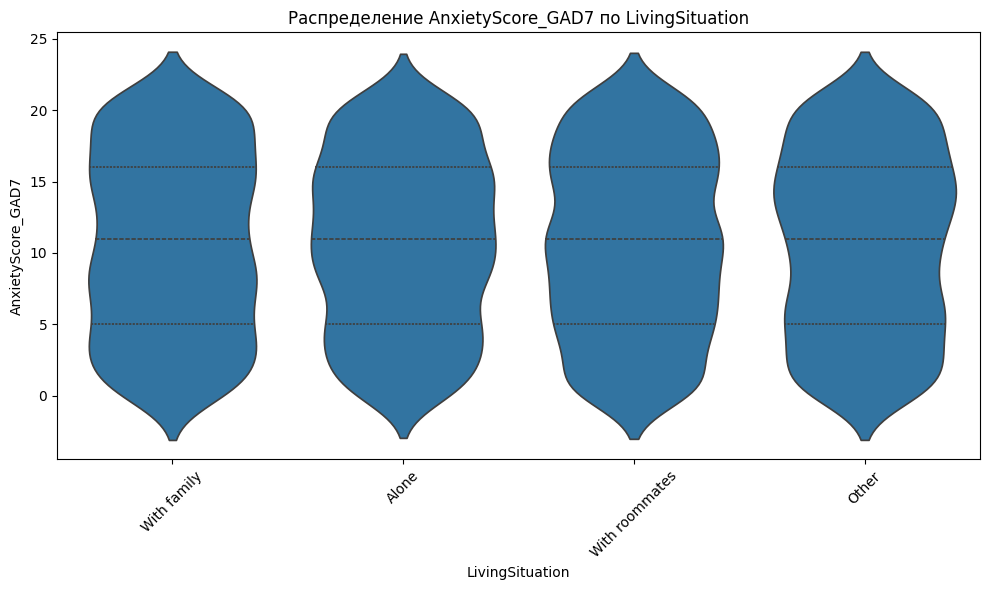

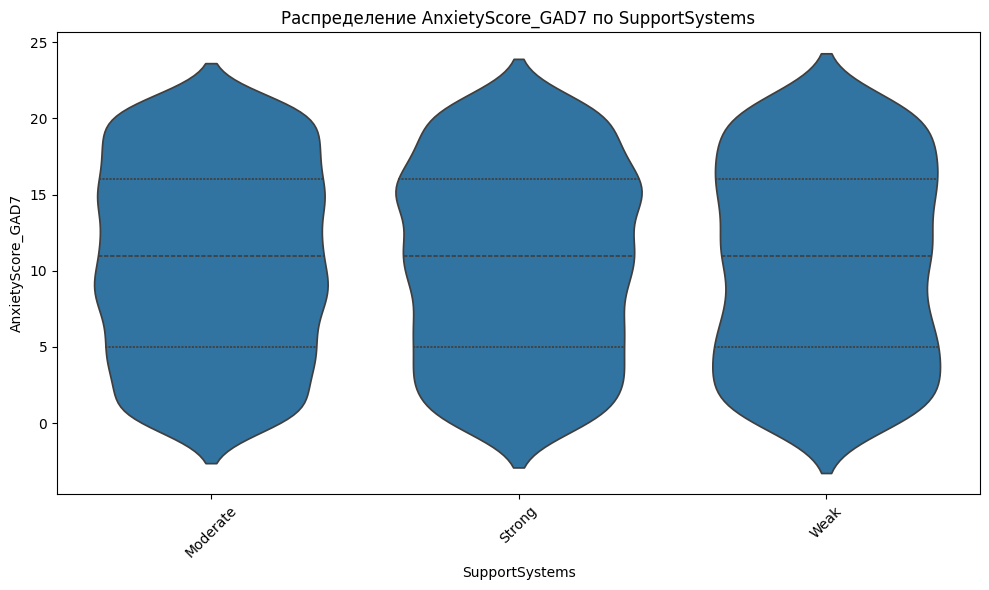

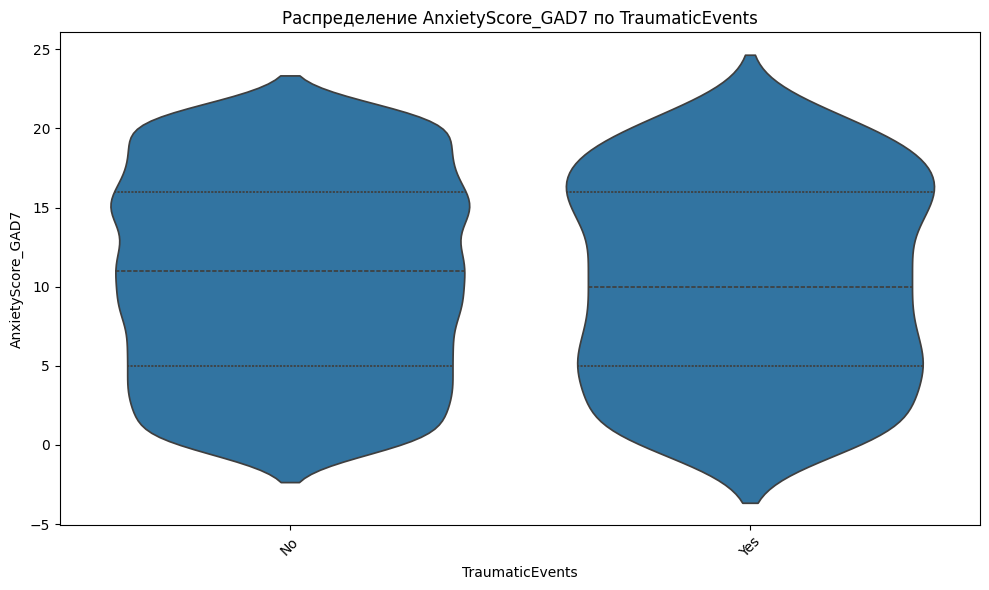

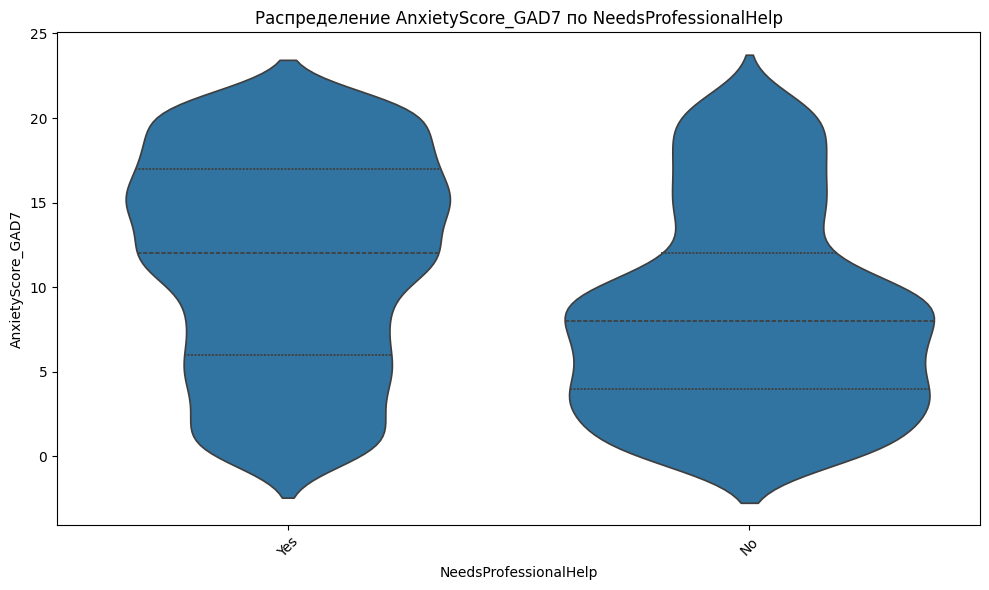

In [ ]:
categorical_cols = df_under_study.select_dtypes(include=['object', 'category']).columns.tolist()

# Построим боксплоты для каждой категориальной переменной
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=col, y=target, data=df_under_study, inner='quartile')
    plt.title(f'Распределение {target} по {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-3683489029.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=col, y='AnxietyScore_GAD7', data=df_under_study, ci='sd')


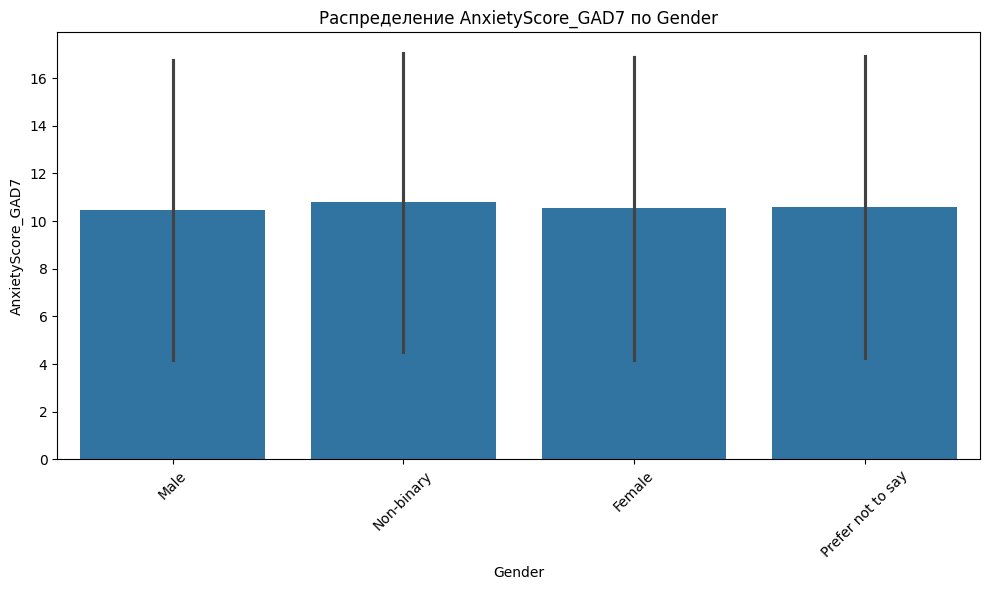

/tmp/ipython-input-3683489029.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=col, y='AnxietyScore_GAD7', data=df_under_study, ci='sd')


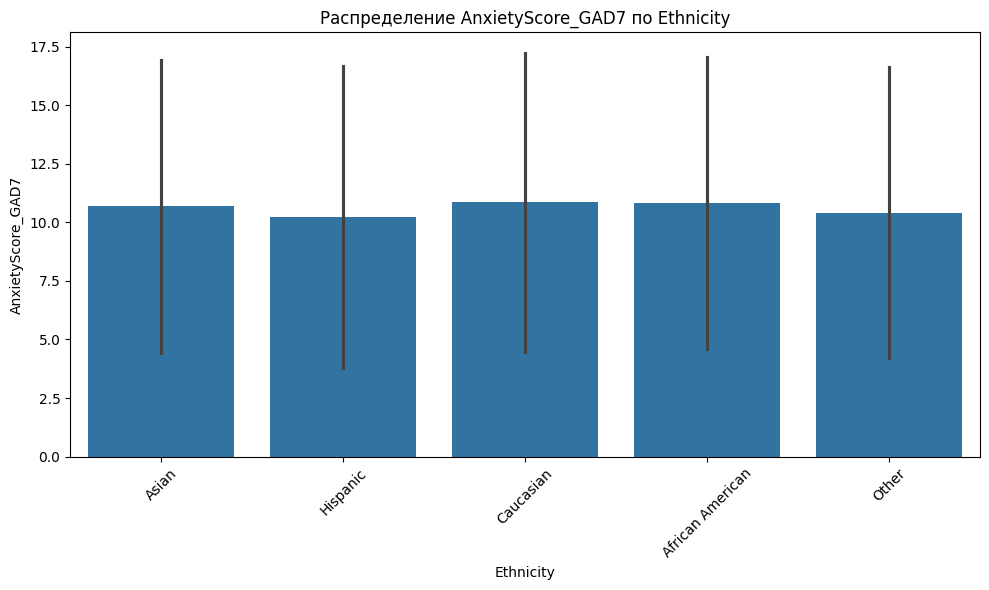

/tmp/ipython-input-3683489029.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=col, y='AnxietyScore_GAD7', data=df_under_study, ci='sd')


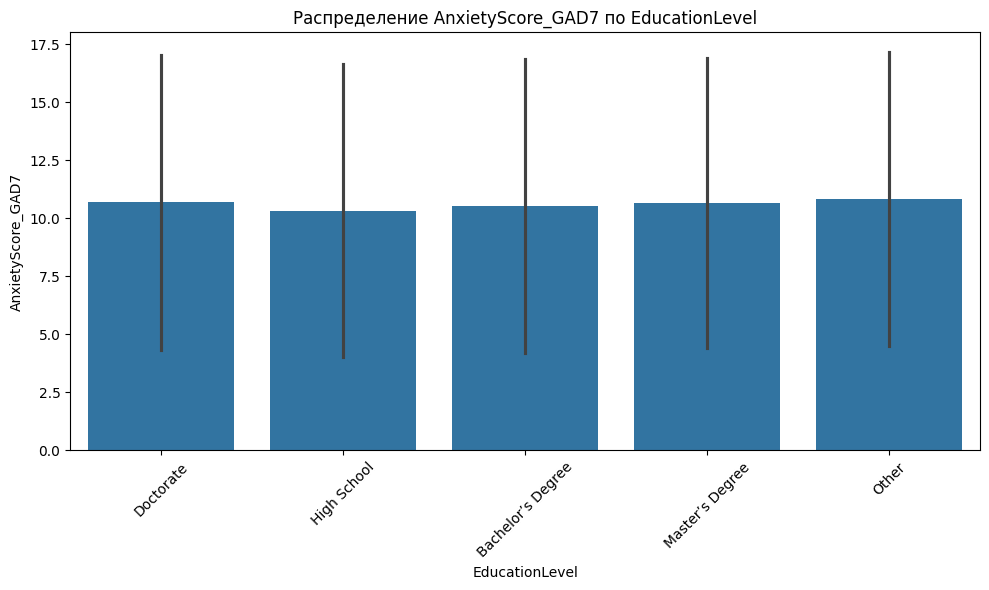

/tmp/ipython-input-3683489029.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=col, y='AnxietyScore_GAD7', data=df_under_study, ci='sd')


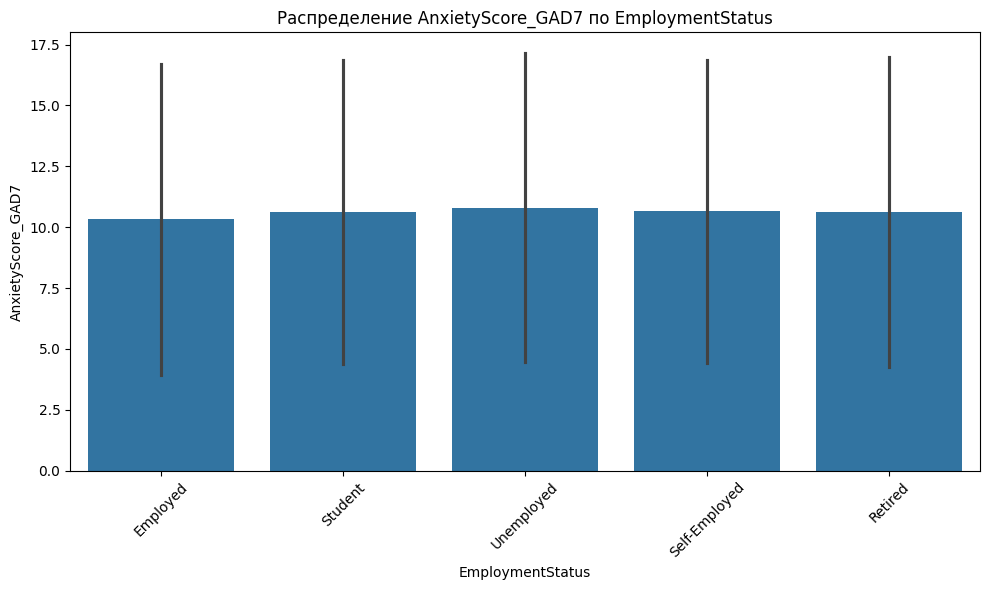

/tmp/ipython-input-3683489029.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=col, y='AnxietyScore_GAD7', data=df_under_study, ci='sd')


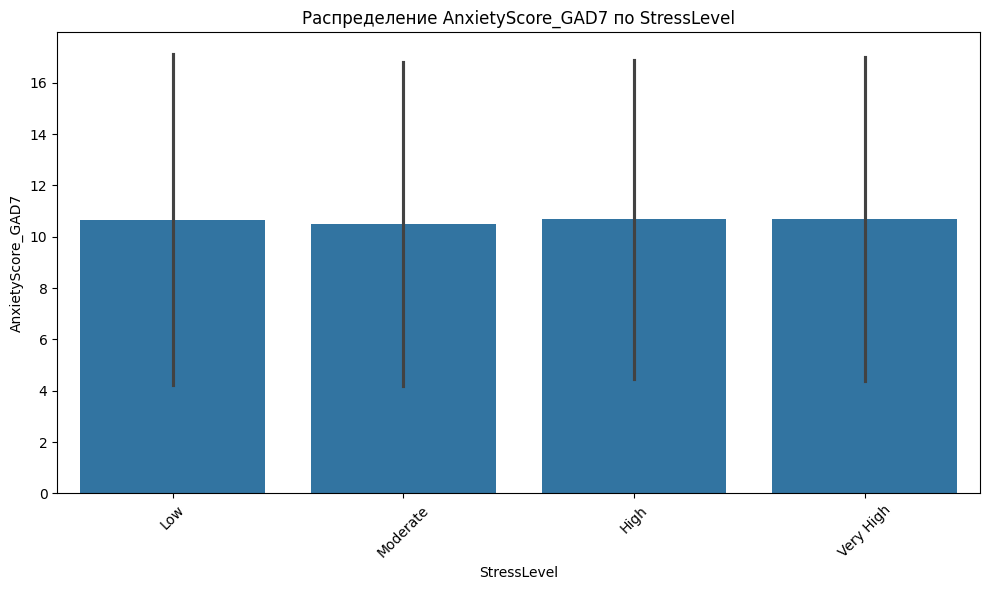

/tmp/ipython-input-3683489029.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=col, y='AnxietyScore_GAD7', data=df_under_study, ci='sd')


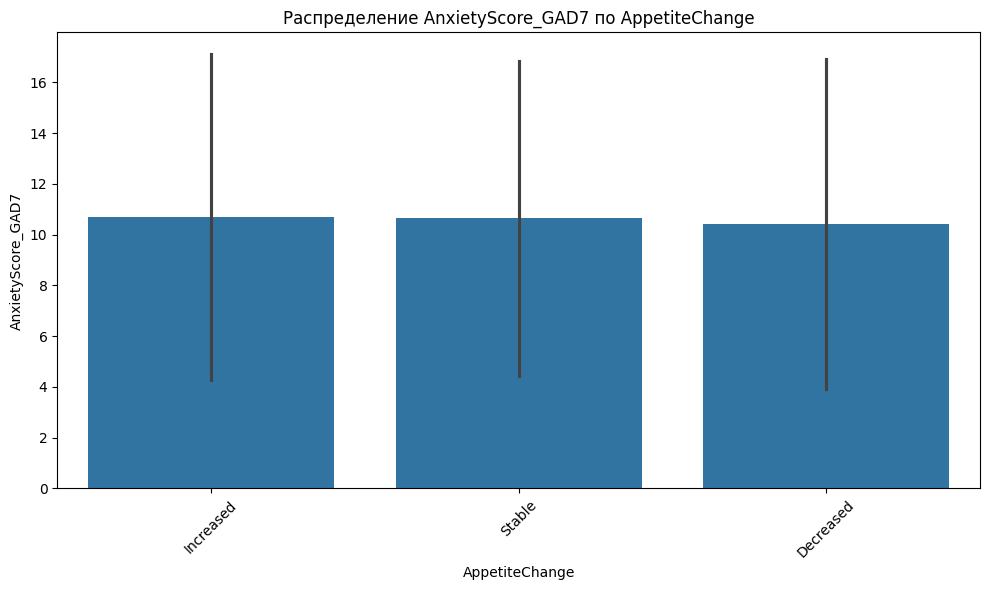

/tmp/ipython-input-3683489029.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=col, y='AnxietyScore_GAD7', data=df_under_study, ci='sd')


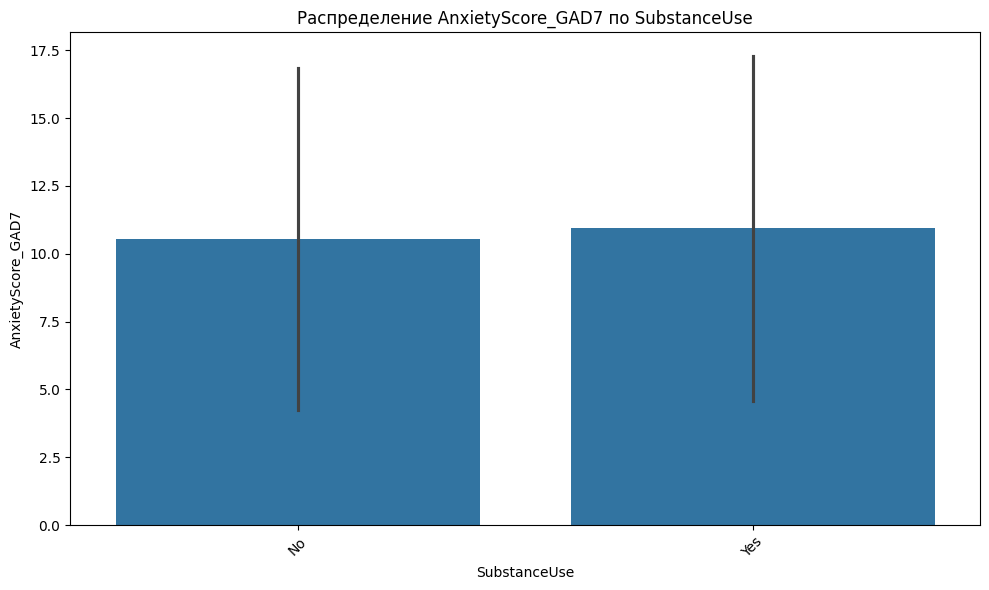

/tmp/ipython-input-3683489029.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=col, y='AnxietyScore_GAD7', data=df_under_study, ci='sd')


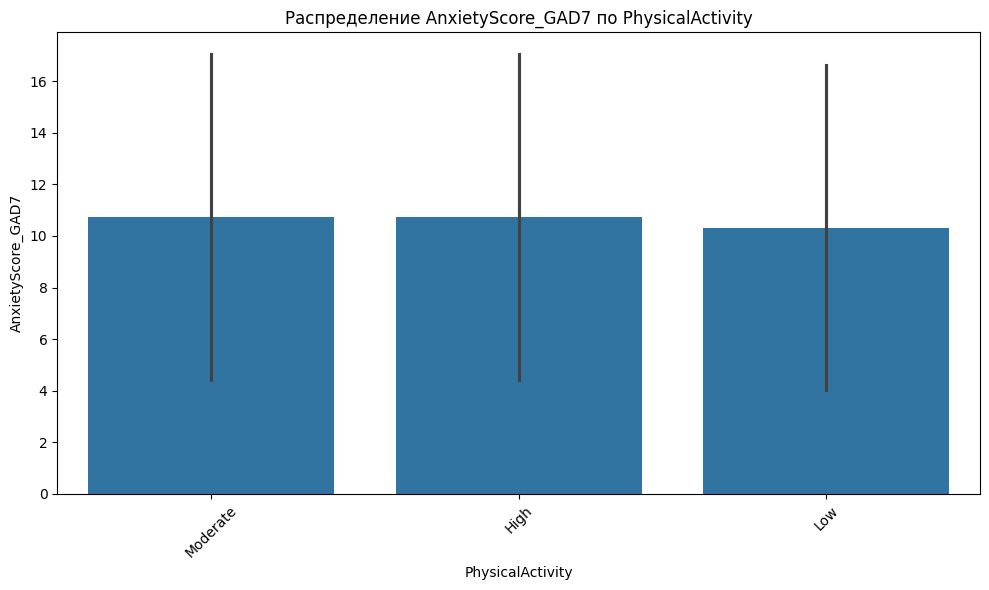

/tmp/ipython-input-3683489029.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=col, y='AnxietyScore_GAD7', data=df_under_study, ci='sd')


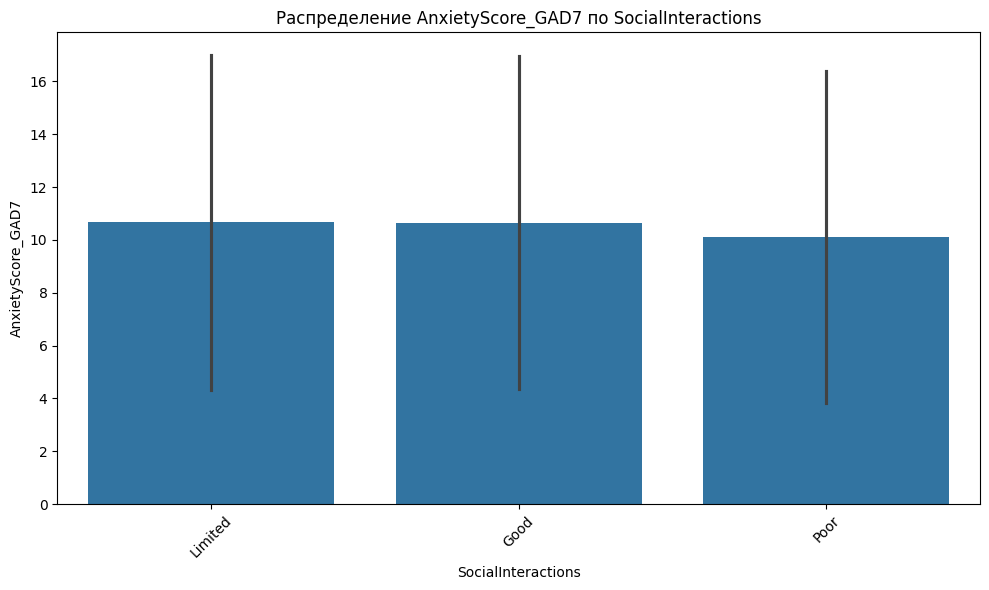

/tmp/ipython-input-3683489029.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=col, y='AnxietyScore_GAD7', data=df_under_study, ci='sd')


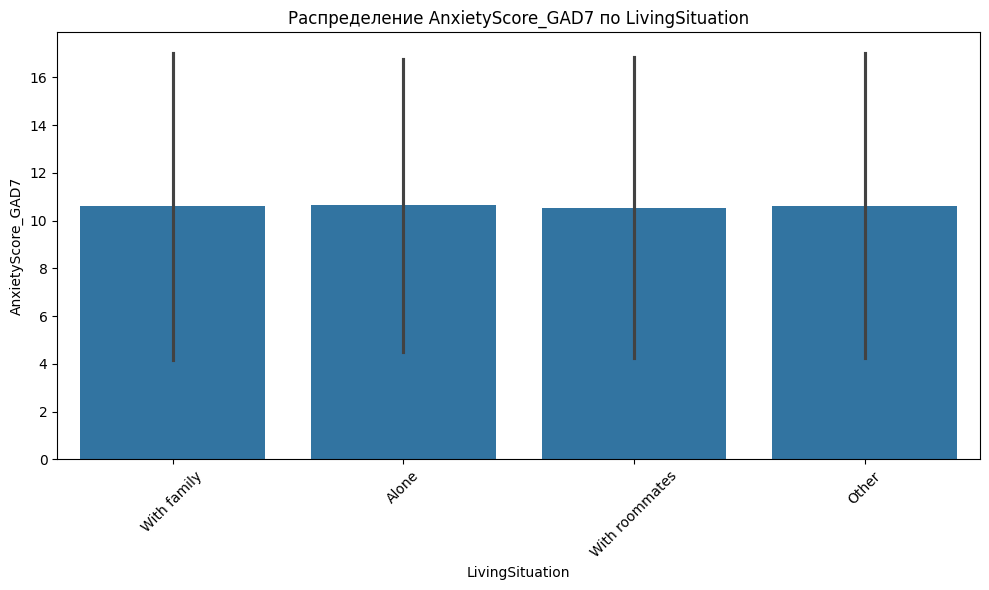

/tmp/ipython-input-3683489029.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=col, y='AnxietyScore_GAD7', data=df_under_study, ci='sd')


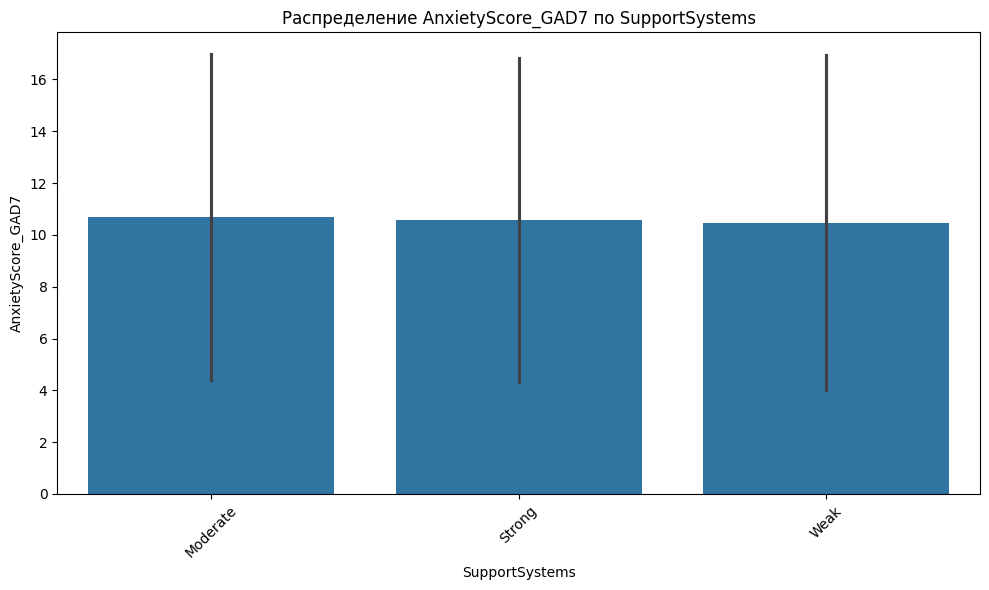

/tmp/ipython-input-3683489029.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=col, y='AnxietyScore_GAD7', data=df_under_study, ci='sd')


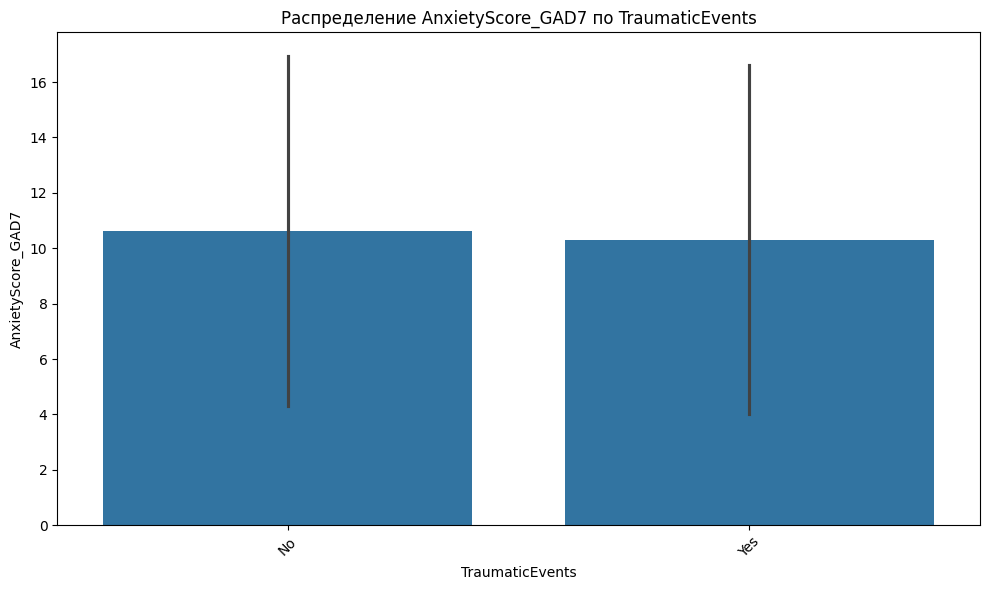

/tmp/ipython-input-3683489029.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=col, y='AnxietyScore_GAD7', data=df_under_study, ci='sd')


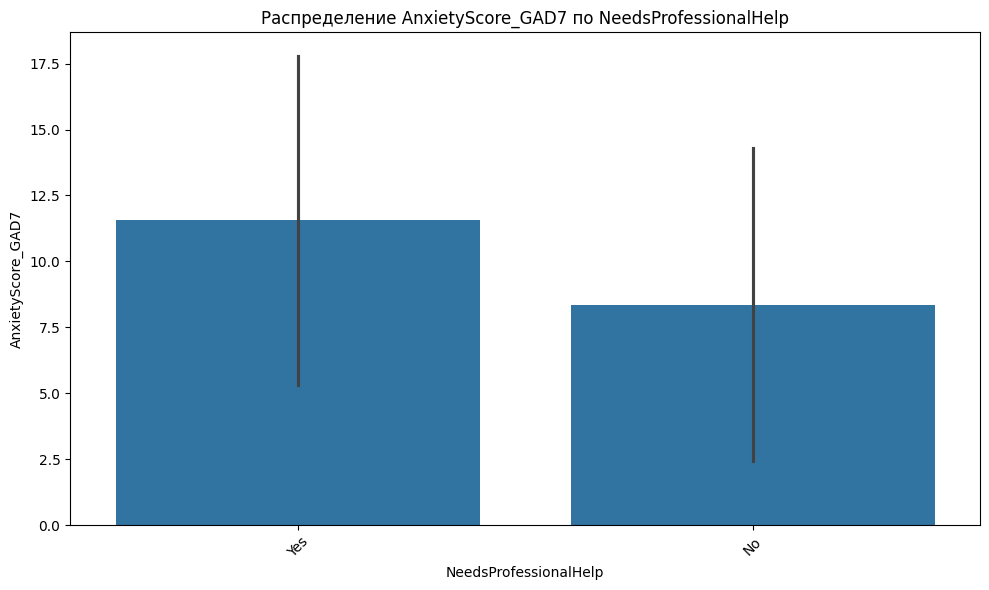

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y='AnxietyScore_GAD7', data=df_under_study, ci='sd')
    plt.title(f'Распределение {target} по {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

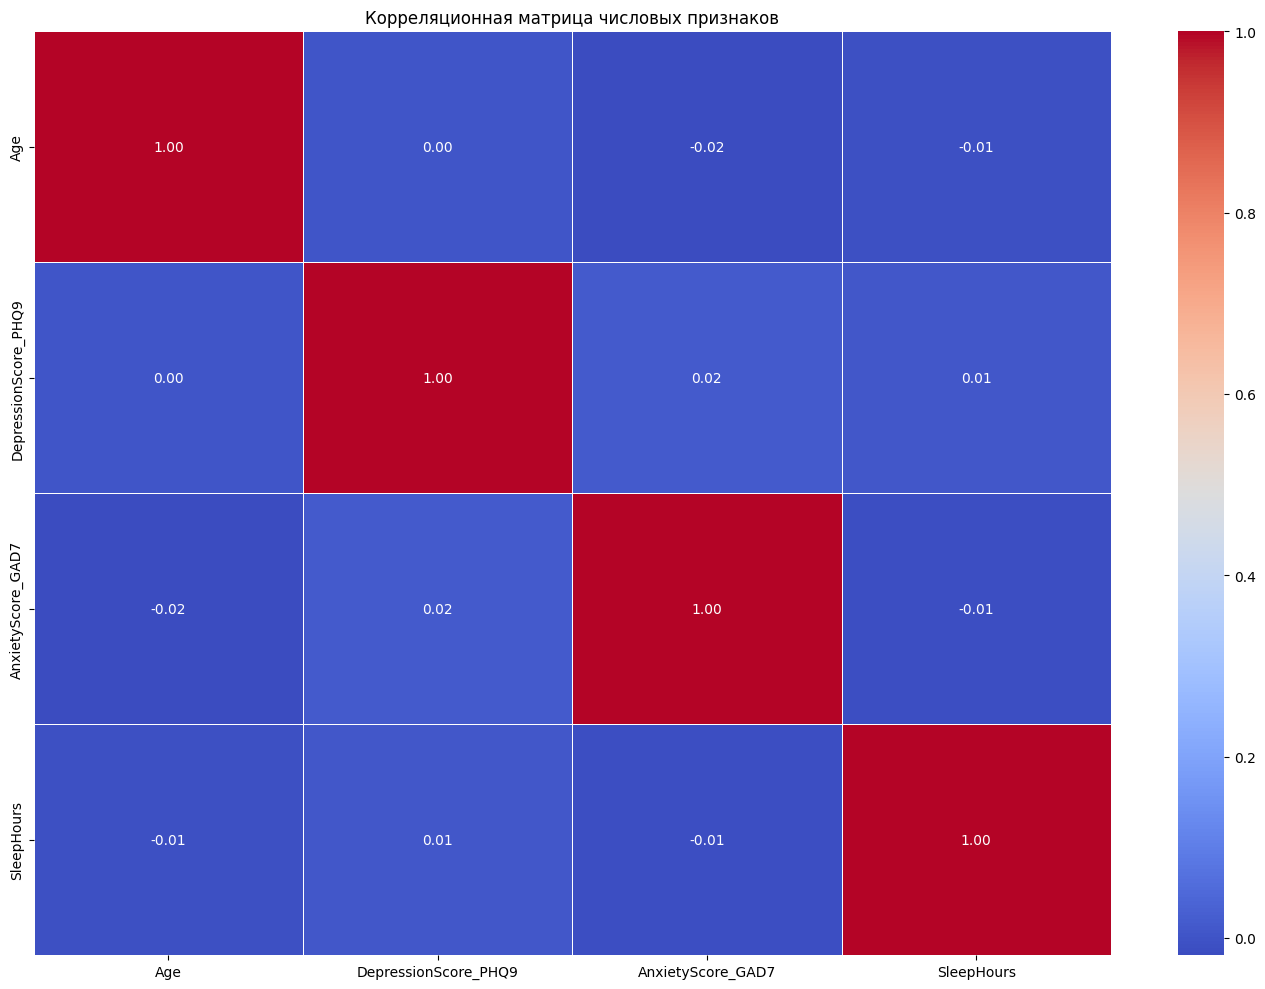

In [ ]:
numeric_df = df_under_study.select_dtypes(include=['number'])

# 2. Посчитаем корреляционную матрицу
corr_matrix = numeric_df.corr()

# 3. Построим тепловую карту
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица числовых признаков')
plt.tight_layout()
plt.show()

После просмотра графиков стало понятно, что в этом датасете корреляций нет совсем. Возможно, что он вообще синтезирован. Возьмем следующий датасет.

Mind-O-Meter - Dataset to assess when it's time to seek professional mental health support.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Anxiety and Indicators - Clean Dataset.csv to Anxiety and Indicators - Clean Dataset.csv


In [ ]:
df_observing = pd.read_csv("Anxiety and Indicators - Clean Dataset.csv")

In [ ]:
df_observing.head()

,Age,Occupation,Sleep Hours,Physical activity,Caffeine dosage day,Alcohol drinks week,Smoking,Family history anx,Stress level,Sweating level,Dizziness,Medication,Therapy sessions month,Recent life event,Anxiety level,Espresso Day,Wellness score
0,29,Artist,6.0,2.7,181,10,1,0,10,4,0,1,3,1,5.0,3.02,4.01
1,46,Nurse,6.2,5.7,200,8,1,1,1,2,1,0,2,0,3.0,3.33,6.70
2,64,Other,5.0,3.7,117,4,0,1,1,3,0,0,1,1,1.0,1.95,7.10
3,20,Scientist,5.8,2.8,360,6,1,0,4,3,0,0,0,0,2.0,6.00,5.51
4,49,Other,8.2,2.3,247,4,1,0,1,4,1,1,1,0,1.0,4.12,7.10


In [ ]:
df_observing.shape

(11000, 17)

In [ ]:
df_observing.info()
df_observing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     11000 non-null  int64  
 1   Occupation              11000 non-null  object 
 2   Sleep Hours             11000 non-null  float64
 3   Physical activity       11000 non-null  float64
 4   Caffeine dosage day     11000 non-null  int64  
 5   Alcohol drinks week     11000 non-null  int64  
 6   Smoking                 11000 non-null  int64  
 7   Family history anx      11000 non-null  int64  
 8   Stress level            11000 non-null  int64  
 9   Sweating level          11000 non-null  int64  
 10  Dizziness               11000 non-null  int64  
 11  Medication              11000 non-null  int64  
 12  Therapy sessions month  11000 non-null  int64  
 13  Recent life event       11000 non-null  int64  
 14  Anxiety level           11000 non-null

,Age,Sleep Hours,Physical activity,Caffeine dosage day,Alcohol drinks week,Smoking,Family history anx,Stress level,Sweating level,Dizziness,Medication,Therapy sessions month,Recent life event,Anxiety level,Espresso Day,Wellness score
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,40.241727,6.650691,2.942136,286.090000,9.701636,0.525364,0.531545,5.856364,3.080636,0.515636,0.515091,2.427818,0.511182,3.929364,4.768186,4.869020
std,13.236140,1.227509,1.827825,144.813157,5.689713,0.499379,0.499027,2.927202,1.398877,0.499778,0.499795,2.183106,0.499898,2.122533,2.413572,1.368244
min,18.000000,2.300000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.380000
25%,29.000000,5.900000,1.500000,172.000000,5.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.870000,4.120000
50%,40.000000,6.700000,2.800000,273.000000,10.000000,1.000000,1.000000,6.000000,3.000000,1.000000,1.000000,2.000000,1.000000,4.000000,4.550000,5.020000
75%,51.000000,7.500000,4.200000,382.000000,15.000000,1.000000,1.000000,8.000000,4.000000,1.000000,1.000000,4.000000,1.000000,5.000000,6.370000,5.840000
max,64.000000,11.300000,10.100000,599.000000,19.000000,1.000000,1.000000,10.000000,5.000000,1.000000,1.000000,12.000000,1.000000,10.000000,9.980000,8.690000


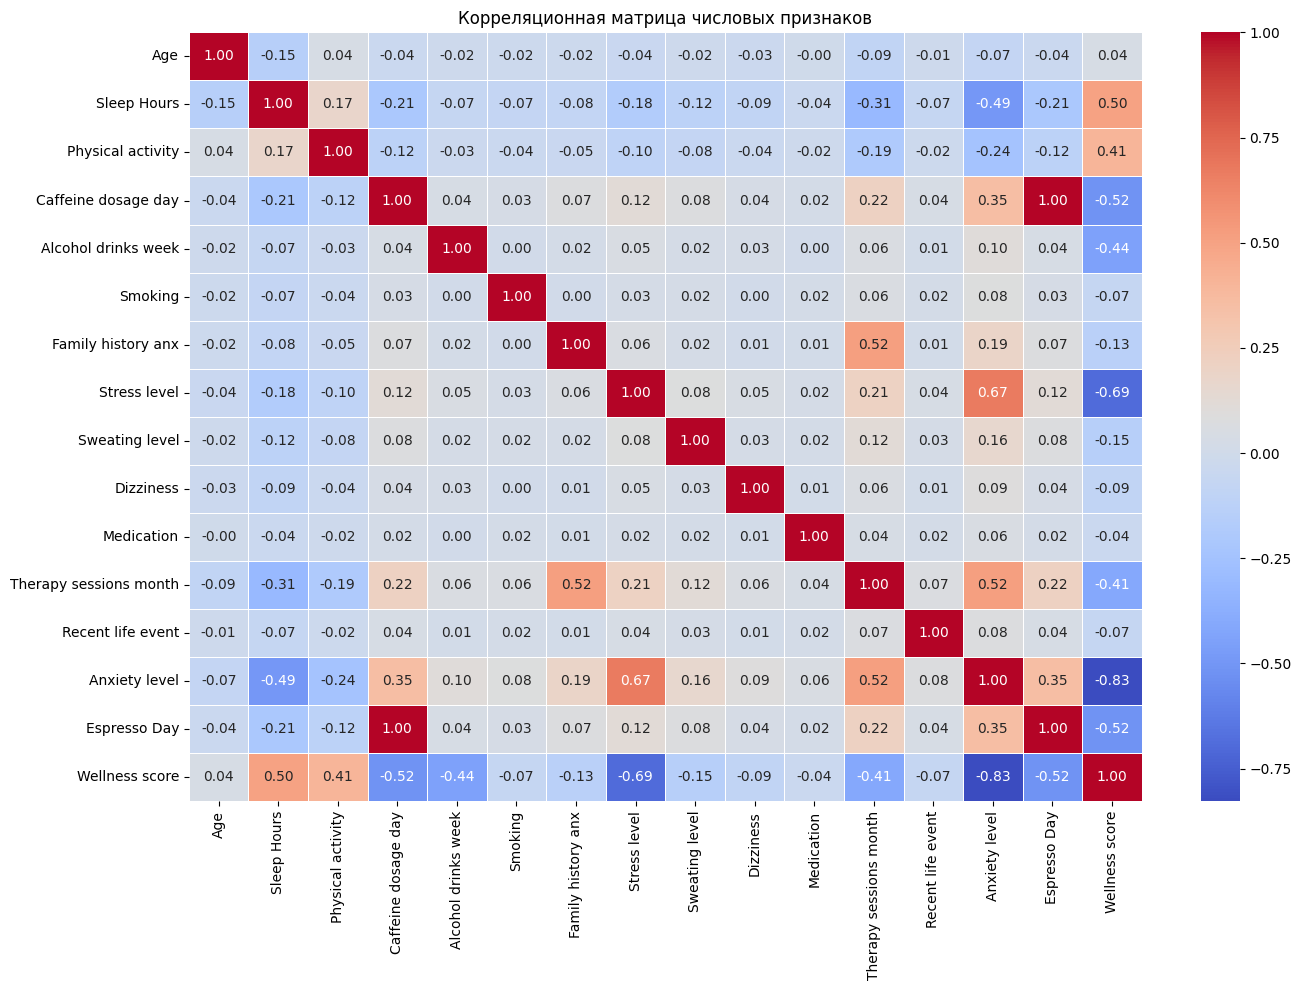

In [ ]:
numeric_df = df_observing.select_dtypes(include=['number'])

# 2. Посчитаем корреляционную матрицу
corr_matrix = numeric_df.corr()

# 3. Построим тепловую карту
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица числовых признаков')
plt.tight_layout()
plt.show()

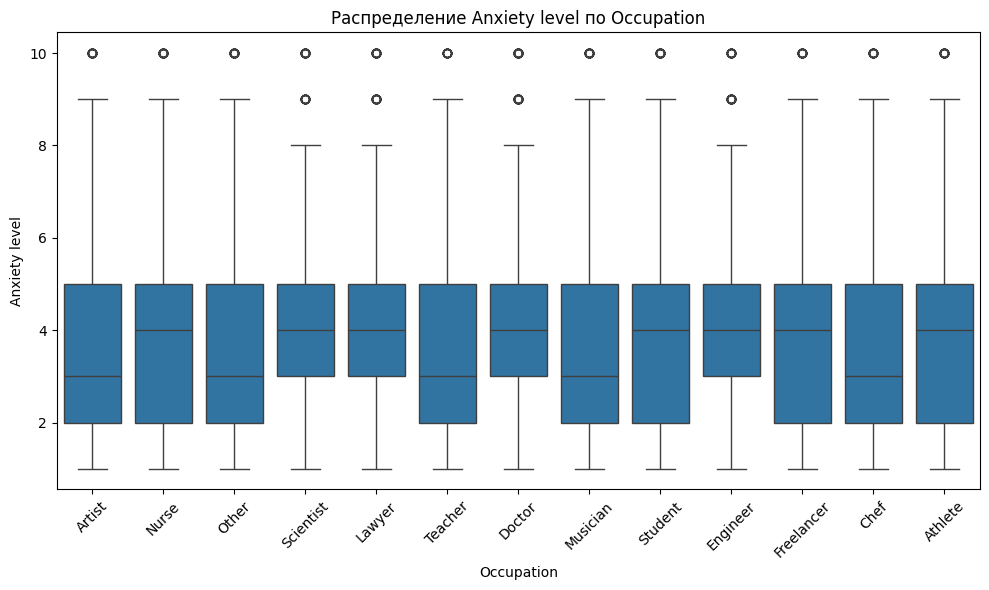

In [ ]:
target = 'Anxiety level'

# Найдём категориальные переменные (номинативные)
categorical_cols = df_observing.select_dtypes(include=['object', 'category']).columns.tolist()

# Построим боксплоты для каждой категориальной переменной
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y=target, data=df_observing)
    plt.title(f'Распределение {target} по {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

df_Changed - Данные, которые пойдут для разделения на X, Y и, в целом, для построения бейзлайна

In [ ]:
df_Changed=df_observing

In [ ]:
X=df_Changed.drop(['Anxiety level','Occupation'],axis=1)
y=df_Changed['Anxiety level']

In [ ]:
X.head()

,Age,Sleep Hours,Physical activity,Caffeine dosage day,Alcohol drinks week,Smoking,Family history anx,Stress level,Sweating level,Dizziness,Medication,Therapy sessions month,Recent life event,Espresso Day,Wellness score
0,29,6.0,2.7,181,10,1,0,10,4,0,1,3,1,3.02,4.01
1,46,6.2,5.7,200,8,1,1,1,2,1,0,2,0,3.33,6.70
2,64,5.0,3.7,117,4,0,1,1,3,0,0,1,1,1.95,7.10
3,20,5.8,2.8,360,6,1,0,4,3,0,0,0,0,6.00,5.51
4,49,8.2,2.3,247,4,1,0,1,4,1,1,1,0,4.12,7.10


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% данных пойдут в тест
    random_state=42,    # для воспроизводимости
    shuffle=True        # перемешать данные перед разбиением
)

In [ ]:
rf_regr=RandomForestRegressor(random_state=42 )

In [ ]:

param_dist = {
    'n_estimators': np.arange(50,100,10),
    'max_depth': np.arange(2,10,2),
    'min_samples_split': np.arange(2, 16),
    'min_samples_leaf': np.arange(1, 8)
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(
    rf_regr,
    param_distributions=param_dist,
    n_iter=40,
    cv=5,
    n_jobs=-1,
    random_state=42,
)

In [ ]:
rand_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'max_depth': array([2, 4, 6, 8]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                                        'n_estimators': array([50, 60, 70, 80, 90])},
                   random_state=42)

In [ ]:
My_best_params=rand_search.best_params_
My_best_params

{'n_estimators': np.int64(90),
 'min_samples_split': np.int64(5),
 'min_samples_leaf': np.int64(3),
 'max_depth': np.int64(8)}

In [ ]:
BaseLine_BestModel_2=rand_search.best_estimator_

In [ ]:
Y_predict=BaseLine_BestModel_2.predict(X_test)

In [ ]:
n = X_test.shape[0]   # число наблюдений
p = X_test.shape[1]
r2_score(y_test, Y_predict)

0.8514374592426805

In [ ]:
mae = mean_absolute_error(y_test, Y_predict)
mse = mean_squared_error(y_test, Y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, Y_predict)
adj_r2_score = 1 - (1 - r2_score(y_test, Y_predict)) * (n - 1) / (n - p - 1)

print(f"🔹 Средняя абсолютная ошибка (MAE): {mae:.3f}")
print(f"🔹 Среднеквадратичная ошибка (MSE): {mse:.3f}")
print(f"🔹 Корень из MSE (RMSE): {rmse:.3f}")
print(f"🔹 Коэффициент детерминации (R²): {r2:.3f}")
print(f"🔹 Скорректированный R²: {adj_r2_score:.3f}")

🔹 Средняя абсолютная ошибка (MAE): 0.675
🔹 Среднеквадратичная ошибка (MSE): 0.688
🔹 Корень из MSE (RMSE): 0.830
🔹 Коэффициент детерминации (R²): 0.851
🔹 Скорректированный R²: 0.850
